In [1]:
#Not all of these imports are actually used in the current iteration of this notebook but may be used in the future
import tweepy as tw
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import DateFormatter
import numpy as np
import scipy as sp
from scipy import integrate
import pandas as pd
import collections
import threading
from datetime import datetime, timedelta
from customFunctions import *
import operator
import csv
from datetime import datetime
import os

In [2]:
#Setting up the arrays that hold data for members by party and chamber
HouseR = [[]]
HouseD = [[]]
HouseO = [[]]
SenateR = [[]]
SenateD = [[]]
SenateO = [[]]

with open('LookupSheets/116thCongressTwitter.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            if(not (row[7] == "PR" or row[7] == "DC" or row[7] == "USVI" or row[7] == "NMI" or row[7] == "GU")):
                # official screenname, campaign screenname, name, party code, district (if Rep), state icps, state, year born, dw nom dim 1, dw nom dim 2
                info = [row[2], row[3], row[0], row[8], row[6], row[4], row[7], row[9], row[10], row[11]]

                if(row[1] == "Rep"):
                    if(row[8] == "200" or row[8] == "331"): HouseR = HouseR + [info]
                    elif(row[8] == "100" or row[8] == "329"): HouseD = HouseD + [info]
                    else: HouseO = HouseO + [info]

                if(row[1] == "Sen"):
                    if(row[8] == "200" or row[8] == "331"): SenateR = SenateR + [info]
                    elif(row[8] == "100" or row[8] == "329"): SenateD = SenateD + [info]
                    else: SenateO = SenateO + [info]
                    
HouseR = HouseR[1:]
HouseD = HouseD[1:]
HouseO = HouseO[1:]
SenateR = SenateR[1:]
SenateD = SenateD[1:]
SenateO = SenateO[1:]

### Assembling data for prepandemic tweets from Jan 20, 2019 to Jan 20, 2020

In [3]:
parent_dir = "C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan"
t_1 = datetime(2019, 1, 20) # first covid case in the US
t_2 = datetime(2020, 1, 20) # End date of scrape range

delta = (t_2 - t_1 + timedelta(days=1)).days 

#Creates the array that holds each day in timespan
dates_prepandemic = np.array([])

date = t_1
while date <= t_2:
    dates_prepandemic = np.append(dates_prepandemic, date)
    date+=timedelta(days=1)

#Arrays of zeros where daily frequencies will be tallied
total_prepandemic_all_freq = np.zeros(delta)
total_prepandemic_all_likes = np.zeros(delta)
total_prepandemic_all_RTs = np.zeros(delta)

campaign_total_prepandemic_all_freq = np.zeros(delta)
campaign_total_prepandemic_all_likes = np.zeros(delta)
campaign_total_prepandemic_all_RTs = np.zeros(delta)

official_total_prepandemic_all_freq = np.zeros(delta)
official_total_prepandemic_all_likes = np.zeros(delta)
official_total_prepandemic_all_RTs = np.zeros(delta)

House_D_prepandemic_all_freq = np.zeros(delta)
House_D_prepandemic_all_likes = np.zeros(delta)
House_D_prepandemic_all_RTs = np.zeros(delta)

campaign_House_D_prepandemic_all_freq = np.zeros(delta)
campaign_House_D_prepandemic_all_likes = np.zeros(delta)
campaign_House_D_prepandemic_all_RTs = np.zeros(delta)

official_House_D_prepandemic_all_freq = np.zeros(delta)
official_House_D_prepandemic_all_likes = np.zeros(delta)
official_House_D_prepandemic_all_RTs = np.zeros(delta)

House_R_prepandemic_all_freq = np.zeros(delta)
House_R_prepandemic_all_likes = np.zeros(delta)
House_R_prepandemic_all_RTs = np.zeros(delta)

campaign_House_R_prepandemic_all_freq = np.zeros(delta)
campaign_House_R_prepandemic_all_likes = np.zeros(delta)
campaign_House_R_prepandemic_all_RTs = np.zeros(delta)

official_House_R_prepandemic_all_freq = np.zeros(delta)
official_House_R_prepandemic_all_likes = np.zeros(delta)
official_House_R_prepandemic_all_RTs = np.zeros(delta)

#Justin Amash
House_O_prepandemic_all_freq = np.zeros(delta)
House_O_prepandemic_all_likes = np.zeros(delta)
House_O_prepandemic_all_RTs = np.zeros(delta)

campaign_House_O_prepandemic_all_freq = np.zeros(delta)
campaign_House_O_prepandemic_all_likes = np.zeros(delta)
campaign_House_O_prepandemic_all_RTs = np.zeros(delta)

official_House_O_prepandemic_all_freq = np.zeros(delta)
official_House_O_prepandemic_all_likes = np.zeros(delta)
official_House_O_prepandemic_all_RTs = np.zeros(delta)

Senate_D_prepandemic_all_freq = np.zeros(delta)
Senate_D_prepandemic_all_likes = np.zeros(delta)
Senate_D_prepandemic_all_RTs = np.zeros(delta)

campaign_Senate_D_prepandemic_all_freq = np.zeros(delta)
campaign_Senate_D_prepandemic_all_likes = np.zeros(delta)
campaign_Senate_D_prepandemic_all_RTs = np.zeros(delta)

official_Senate_D_prepandemic_all_freq = np.zeros(delta)
official_Senate_D_prepandemic_all_likes = np.zeros(delta)
official_Senate_D_prepandemic_all_RTs = np.zeros(delta)

Senate_R_prepandemic_all_freq = np.zeros(delta)
Senate_R_prepandemic_all_likes = np.zeros(delta)
Senate_R_prepandemic_all_RTs = np.zeros(delta)

campaign_Senate_R_prepandemic_all_freq = np.zeros(delta)
campaign_Senate_R_prepandemic_all_likes = np.zeros(delta)
campaign_Senate_R_prepandemic_all_RTs = np.zeros(delta)

official_Senate_R_prepandemic_all_freq = np.zeros(delta)
official_Senate_R_prepandemic_all_likes = np.zeros(delta)
official_Senate_R_prepandemic_all_RTs = np.zeros(delta)

#Tally of uses of keywords
covid_freq = np.zeros(delta)
corona_freq = np.zeros(delta)
socialdistance_freq = np.zeros(delta)
wuhanchina_freq = np.zeros(delta)

#Creates the array that holds each day in timespan
dates = np.array([])

date = t_1
while date <= t_2:
    dates = np.append(dates, date)
    date+=timedelta(days=1)

#Loop through tweet data and tally
for MC in HouseD:
    MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'

    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            #print(campaign_tweets)
            
            for row in csv_reader:
                if os.path.getsize(campaign_tweets) == 0:
                    break

                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_prepandemic_all_freq, idx, 1)
                    np.add.at(total_prepandemic_all_likes, idx, 1)
                    np.add.at(total_prepandemic_all_RTs, idx, 1)
                    
                    np.add.at(campaign_total_prepandemic_all_freq, idx, 1)
                    np.add.at(campaign_total_prepandemic_all_likes, idx, 1)
                    np.add.at(campaign_total_prepandemic_all_RTs, idx, 1)
                    
                    np.add.at(House_D_prepandemic_all_freq, idx, 1)
                    np.add.at(House_D_prepandemic_all_likes, idx, int(row[4]))
                    np.add.at(House_D_prepandemic_all_RTs, idx, int(row[3]))
                    
                    np.add.at(campaign_House_D_prepandemic_all_freq, idx, 1)
                    np.add.at(campaign_House_D_prepandemic_all_likes, idx, int(row[4]))
                    np.add.at(campaign_House_D_prepandemic_all_RTs, idx, int(row[3]))
#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                             
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            #print(official_tweets)
            
            for row in csv_reader:
                if os.path.getsize(official_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(official_total_prepandemic_all_freq, idx, 1)
                np.add.at(official_total_prepandemic_all_likes, idx, 1)
                np.add.at(official_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(House_D_prepandemic_all_freq, idx, 1)
                np.add.at(House_D_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(House_D_prepandemic_all_RTs, idx, int(row[3]))

                np.add.at(official_House_D_prepandemic_all_freq, idx, 1)
                np.add.at(official_House_D_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(official_House_D_prepandemic_all_RTs, idx, int(row[3]))
#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                        
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

for MC in HouseR:
    MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            #print(campaign_tweets)
            
            for row in csv_reader:
                if os.path.getsize(campaign_tweets) == 0:
                    break
                
                #if(len(row) != 0):
                    
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(campaign_total_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_total_prepandemic_all_likes, idx, 1)
                np.add.at(campaign_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(House_R_prepandemic_all_freq, idx, 1)
                np.add.at(House_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(House_R_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(campaign_House_R_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_House_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(campaign_House_R_prepandemic_all_RTs, idx, int(row[3]))
#                    UNCOMMENT WHEN CHECKING KEYWORDS                   
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]

#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                        
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            #print(official_tweets)
            
            for row in csv_reader:
                if os.path.getsize(official_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(official_total_prepandemic_all_freq, idx, 1)
                np.add.at(official_total_prepandemic_all_likes, idx, 1)
                np.add.at(official_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(House_R_prepandemic_all_freq, idx, 1)
                np.add.at(House_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(House_R_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(official_House_R_prepandemic_all_freq, idx, 1)
                np.add.at(official_House_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(official_House_R_prepandemic_all_RTs, idx, int(row[3]))
#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

for MC in HouseO:
    MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            #print(campaign_tweets)
            
            for row in csv_reader:
                if os.path.getsize(campaign_tweets) == 0:
                    break
    
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(campaign_total_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_total_prepandemic_all_likes, idx, 1)
                np.add.at(campaign_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(House_O_prepandemic_all_freq, idx, 1)
                np.add.at(House_O_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(House_O_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(campaign_House_O_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_House_O_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(campaign_House_O_prepandemic_all_RTs, idx, int(row[3]))

#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            #print(official_tweets)
            
            for row in csv_reader:
                if os.path.getsize(official_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(official_total_prepandemic_all_freq, idx, 1)
                np.add.at(official_total_prepandemic_all_likes, idx, 1)
                np.add.at(official_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(House_O_prepandemic_all_freq, idx, 1)
                np.add.at(House_O_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(House_O_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(official_House_O_prepandemic_all_freq, idx, 1)
                np.add.at(official_House_O_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(official_House_O_prepandemic_all_RTs, idx, int(row[3]))

#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

#Loop through tweet data and tally
for MC in SenateD:
    MC_dir = parent_dir + "/Senate/" + MC[6] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            print(campaign_tweets)
            
            for row in csv_reader:
                if os.path.getsize(campaign_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(campaign_total_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_total_prepandemic_all_likes, idx, 1)
                np.add.at(campaign_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(Senate_D_prepandemic_all_freq, idx, 1)
                np.add.at(Senate_D_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(Senate_D_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(campaign_Senate_D_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_Senate_D_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(campaign_Senate_D_prepandemic_all_RTs, idx, int(row[3]))

#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                            
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            print(official_tweets)
            
            for row in csv_reader:
                if os.path.getsize(official_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(official_total_prepandemic_all_freq, idx, 1)
                np.add.at(official_total_prepandemic_all_likes, idx, 1)
                np.add.at(official_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(Senate_D_prepandemic_all_freq, idx, 1)
                np.add.at(Senate_D_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(Senate_D_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(official_Senate_D_prepandemic_all_freq, idx, 1)
                np.add.at(official_Senate_D_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(official_Senate_D_prepandemic_all_RTs, idx, int(row[3]))

#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

for MC in SenateR:
    MC_dir = parent_dir + "/Senate/" + MC[6] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            print(campaign_tweets)
            
            for row in csv_reader:
                if os.path.getsize(campaign_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(campaign_total_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_total_prepandemic_all_likes, idx, 1)
                np.add.at(campaign_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(Senate_R_prepandemic_all_freq, idx, 1)
                np.add.at(Senate_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(Senate_R_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(campaign_Senate_R_prepandemic_all_freq, idx, 1)
                np.add.at(campaign_Senate_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(campaign_Senate_R_prepandemic_all_RTs, idx, int(row[3]))
                    
#                    UNCOMMENT WHEN CHECKING KEYWORDS                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')
            
            print(official_tweets)
            
            for row in csv_reader:
                if os.path.getsize(official_tweets) == 0:
                    break
                
                #if(row[1] != ''):
                idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                np.add.at(total_prepandemic_all_freq, idx, 1)
                np.add.at(total_prepandemic_all_likes, idx, 1)
                np.add.at(total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(official_total_prepandemic_all_freq, idx, 1)
                np.add.at(official_total_prepandemic_all_likes, idx, 1)
                np.add.at(official_total_prepandemic_all_RTs, idx, 1)
                
                np.add.at(Senate_R_prepandemic_all_freq, idx, 1)
                np.add.at(Senate_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(Senate_R_prepandemic_all_RTs, idx, int(row[3]))
                
                np.add.at(official_Senate_R_prepandemic_all_freq, idx, 1)
                np.add.at(official_Senate_R_prepandemic_all_likes, idx, int(row[4]))
                np.add.at(official_Senate_R_prepandemic_all_RTs, idx, int(row[3]))

#                    UNCOMMENT WHEN CHECKING KEYWORDS
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]

                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

#Data adjusted per capita
total_prepandemic_all_freq_per_cap = total_prepandemic_all_freq/523
total_prepandemic_all_likes_per_cap = total_prepandemic_all_likes/523
total_prepandemic_all_RTs_per_cap = total_prepandemic_all_RTs/523

campaign_total_prepandemic_all_freq_per_cap = campaign_total_prepandemic_all_freq/523
campaign_total_prepandemic_all_likes_per_cap = campaign_total_prepandemic_all_likes/523
campaign_total_prepandemic_all_RTs_per_cap = campaign_total_prepandemic_all_RTs/523

official_total_prepandemic_all_freq_per_cap = official_total_prepandemic_all_freq/523
official_total_prepandemic_all_likes_per_cap = official_total_prepandemic_all_likes/523
official_total_prepandemic_all_RTs_per_cap = official_total_prepandemic_all_RTs/523

House_D_prepandemic_all_freq_per_cap = House_D_prepandemic_all_freq/229
House_D_prepandemic_all_likes_per_cap = House_D_prepandemic_all_likes/229
House_D_prepandemic_all_RTs_per_cap = House_D_prepandemic_all_RTs/229

campaign_House_D_prepandemic_all_freq_per_cap = campaign_House_D_prepandemic_all_freq/229
campaign_House_D_prepandemic_all_likes_per_cap = campaign_House_D_prepandemic_all_likes/229
campaign_House_D_prepandemic_all_RTs_per_cap = campaign_House_D_prepandemic_all_RTs/229

official_House_D_prepandemic_all_freq_per_cap = official_House_D_prepandemic_all_freq/229
official_House_D_prepandemic_all_likes_per_cap = official_House_D_prepandemic_all_likes/229
official_House_D_prepandemic_all_RTs_per_cap = official_House_D_prepandemic_all_RTs/229

House_R_prepandemic_all_freq_per_cap = House_R_prepandemic_all_freq/197
House_R_prepandemic_all_likes_per_cap = House_R_prepandemic_all_likes/197
House_R_prepandemic_all_RTs_per_cap = House_R_prepandemic_all_RTs/197

campaign_House_R_prepandemic_all_freq_per_cap = campaign_House_R_prepandemic_all_freq/197
campaign_House_R_prepandemic_all_likes_per_cap = campaign_House_R_prepandemic_all_likes/197
campaign_House_R_prepandemic_all_RTs_per_cap = campaign_House_R_prepandemic_all_RTs/197

official_House_R_prepandemic_all_freq_per_cap = official_House_R_prepandemic_all_freq/197
official_House_R_prepandemic_all_likes_per_cap = official_House_R_prepandemic_all_likes/197
official_House_R_prepandemic_all_RTs_per_cap = official_House_R_prepandemic_all_RTs/197

House_prepandemic_all_freq_per_cap = (House_R_prepandemic_all_freq + House_D_prepandemic_all_freq)/429
House_prepandemic_all_likes_per_cap = (House_R_prepandemic_all_likes + House_D_prepandemic_all_likes)/429
House_prepandemic_all_RTs_per_cap = (House_R_prepandemic_all_RTs + House_D_prepandemic_all_RTs)/429

campaign_House_prepandemic_all_freq_per_cap = (campaign_House_R_prepandemic_all_freq + campaign_House_D_prepandemic_all_freq)/429
campaign_House_prepandemic_all_likes_per_cap = (campaign_House_R_prepandemic_all_likes + campaign_House_D_prepandemic_all_likes)/429
campaign_House_prepandemic_all_RTs_per_cap = (campaign_House_R_prepandemic_all_RTs + campaign_House_D_prepandemic_all_RTs)/429

official_House_prepandemic_all_freq_per_cap = (official_House_R_prepandemic_all_freq + official_House_D_prepandemic_all_freq)/429
official_House_prepandemic_all_likes_per_cap = (official_House_R_prepandemic_all_likes + official_House_D_prepandemic_all_likes)/429
official_House_prepandemic_all_RTs_per_cap = (official_House_R_prepandemic_all_RTs + official_House_D_prepandemic_all_RTs)/429

Senate_D_prepandemic_all_freq_per_cap = Senate_D_prepandemic_all_freq/48
Senate_D_prepandemic_all_likes_per_cap = Senate_D_prepandemic_all_likes/48
Senate_D_prepandemic_all_RTs_per_cap = Senate_D_prepandemic_all_RTs/48

campaign_Senate_D_prepandemic_all_freq_per_cap = campaign_Senate_D_prepandemic_all_freq/48
campaign_Senate_D_prepandemic_all_likes_per_cap = campaign_Senate_D_prepandemic_all_likes/48
campaign_Senate_D_prepandemic_all_RTs_per_cap = campaign_Senate_D_prepandemic_all_RTs/48

official_Senate_D_prepandemic_all_freq_per_cap = official_Senate_D_prepandemic_all_freq/48
official_Senate_D_prepandemic_all_likes_per_cap = official_Senate_D_prepandemic_all_likes/48
official_Senate_D_prepandemic_all_RTs_per_cap = official_Senate_D_prepandemic_all_RTs/48

Senate_R_prepandemic_all_freq_per_cap = Senate_R_prepandemic_all_freq/52
Senate_R_prepandemic_all_likes_per_cap = Senate_R_prepandemic_all_likes/52
Senate_R_prepandemic_all_RTs_per_cap = Senate_R_prepandemic_all_RTs/52

campaign_Senate_R_prepandemic_all_freq_per_cap = campaign_Senate_R_prepandemic_all_freq/52
campaign_Senate_R_prepandemic_all_likes_per_cap = campaign_Senate_R_prepandemic_all_likes/52
campaign_Senate_R_prepandemic_all_RTs_per_cap = campaign_Senate_R_prepandemic_all_RTs/52

official_Senate_R_prepandemic_all_freq_per_cap = official_Senate_R_prepandemic_all_freq/52
official_Senate_R_prepandemic_all_likes_per_cap = official_Senate_R_prepandemic_all_likes/52
official_Senate_R_prepandemic_all_RTs_per_cap = official_Senate_R_prepandemic_all_RTs/52

Senate_prepandemic_all_freq_per_cap = (Senate_R_prepandemic_all_freq + Senate_D_prepandemic_all_freq)/100
Senate_prepandemic_all_likes_per_cap = (Senate_R_prepandemic_all_likes + Senate_D_prepandemic_all_likes)/100
Senate_prepandemic_all_RTs_per_cap = (Senate_R_prepandemic_all_RTs + Senate_D_prepandemic_all_RTs)/100

campaign_Senate_prepandemic_all_freq_per_cap = (campaign_Senate_R_prepandemic_all_freq + campaign_Senate_D_prepandemic_all_freq)/100
campaign_Senate_prepandemic_all_likes_per_cap = (campaign_Senate_R_prepandemic_all_likes + campaign_Senate_D_prepandemic_all_likes)/100
campaign_Senate_prepandemic_all_RTs_per_cap = (campaign_Senate_R_prepandemic_all_RTs + campaign_Senate_D_prepandemic_all_RTs)/100

official_Senate_prepandemic_all_freq_per_cap = (official_Senate_R_prepandemic_all_freq + official_Senate_D_prepandemic_all_freq)/100
official_Senate_prepandemic_all_likes_per_cap = (official_Senate_R_prepandemic_all_likes + official_Senate_D_prepandemic_all_likes)/100
official_Senate_prepandemic_all_RTs_per_cap = (official_Senate_R_prepandemic_all_RTs + official_Senate_D_prepandemic_all_RTs)/100

D_prepandemic_all_freq_per_cap = (Senate_D_prepandemic_all_freq + House_D_prepandemic_all_freq)/274
D_prepandemic_all_likes_per_cap = (Senate_D_prepandemic_all_likes + House_D_prepandemic_all_likes)/274
D_prepandemic_all_RTs_per_cap = (Senate_D_prepandemic_all_RTs + House_D_prepandemic_all_RTs)/274

campaign_D_prepandemic_all_freq_per_cap = (campaign_Senate_D_prepandemic_all_freq + campaign_House_D_prepandemic_all_freq)/274
campaign_D_prepandemic_all_likes_per_cap = (campaign_Senate_D_prepandemic_all_likes + campaign_House_D_prepandemic_all_likes)/274
campaign_D_prepandemic_all_RTs_per_cap = (campaign_Senate_D_prepandemic_all_RTs + campaign_House_D_prepandemic_all_RTs)/274

official_D_prepandemic_all_freq_per_cap = (official_Senate_D_prepandemic_all_freq + official_House_D_prepandemic_all_freq)/274
official_D_prepandemic_all_likes_per_cap = (official_Senate_D_prepandemic_all_likes + official_House_D_prepandemic_all_likes)/274
official_D_prepandemic_all_RTs_per_cap = (official_Senate_D_prepandemic_all_RTs + official_House_D_prepandemic_all_RTs)/274

R_prepandemic_all_freq_per_cap = (Senate_R_prepandemic_all_freq + House_R_prepandemic_all_freq)/248
R_prepandemic_all_likes_per_cap = (Senate_R_prepandemic_all_likes + House_R_prepandemic_all_likes)/248
R_prepandemic_all_RTs_per_cap = (Senate_R_prepandemic_all_RTs + House_R_prepandemic_all_RTs)/248

campaign_R_prepandemic_all_freq_per_cap = (campaign_Senate_R_prepandemic_all_freq + campaign_House_R_prepandemic_all_freq)/248
campaign_R_prepandemic_all_likes_per_cap = (campaign_Senate_R_prepandemic_all_likes + campaign_House_R_prepandemic_all_likes)/248
campaign_R_prepandemic_all_RTs_per_cap = (campaign_Senate_R_prepandemic_all_RTs + campaign_House_R_prepandemic_all_RTs)/248

official_R_prepandemic_all_freq_per_cap = (official_Senate_R_prepandemic_all_freq + official_House_R_prepandemic_all_freq)/248
official_R_prepandemic_all_likes_per_cap = (official_Senate_R_prepandemic_all_likes + official_House_R_prepandemic_all_likes)/248
official_R_prepandemic_all_RTs_per_cap = (official_Senate_R_prepandemic_all_RTs + official_House_R_prepandemic_all_RTs)/248

No campaign Tweets found for:  SanfordBishop
No campaign Tweets found for:  RepBonamici
No campaign Tweets found for:  GKButterfield
No official Tweets found for:  
No campaign Tweets found for:  RepJimCosta
No campaign Tweets found for:  RepSusanDavis
No campaign Tweets found for:  RepTedDeutch
No campaign Tweets found for:  RepAnnaEshoo
No campaign Tweets found for:  RepJimmyGomez
No campaign Tweets found for:  RepJoshG
No official Tweets found for:  
No campaign Tweets found for:  RepEBJ
No campaign Tweets found for:  RepAnnieKuster
No campaign Tweets found for:  RepJohnLewis
No campaign Tweets found for:  RepMaloney
No campaign Tweets found for:  RepMcNerney
No official Tweets found for:  RepKweisi
No official Tweets found for:  
No campaign Tweets found for:  RepMarkPocan
No campaign Tweets found for:  RepRoybalAllard
No campaign Tweets found for:  RepBobbyRush
No campaign Tweets found for:  RepJoseSerrano
No official Tweets found for:  RepTerriSewell
No campaign Tweets found for:

C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/HI_MazieHirono/Campaign/mazieforhawaii_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/HI_MazieHirono/Official/MazieHirono_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/AL_DougJones/Campaign/DougJonesHQ_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/AL_DougJones/Official/sendougjones_2019-01-20_to_2020-01-20.csv
No campaign Tweets found for:  timkaine
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/VA_TimKaine/Official/timkaine_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/MN_AmyKlobuchar/Campaign/amyklobuchar_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepo

C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/TN_LamarAlexander/Official/SenAlexander_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/WY_JohnBarrasso/Campaign/barrassoforwyo_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/WY_JohnBarrasso/Official/SenJohnBarrasso_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/TN_MarshaBlackburn/Campaign/VoteMarsha_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/TN_MarshaBlackburn/Official/MarshaBlackburn_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCorona_Private/Data/Prepandemic_Tweets_Jan_to_Jan/Senate/MO_RoyBlunt/Campaign/RoyBluntMO_2019-01-20_to_2020-01-20.csv
C:/Users/Zayne/GitRepos/CongressAndCor

## Assembling data for all pandemic tweets from Jan 20, 2020 to Nov 29, 2020
### (Needs validation)

In [8]:

parent_dir = "Yours here"
t_1 = datetime(2020, 1, 20) # first covid case in the US
t_2 = datetime(2020, 11, 29) # End date of scrape range

delta = (t_2 - t_1 + timedelta(days=1)).days 

#Creates the array that holds each day in timespan
dates_pandemic = np.array([])

date = t_1
while date <= t_2:
    dates_pandemic = np.append(dates_pandemic, date)
    date+=timedelta(days=1)

# #Arrays of zeros where daily frequencies will be tallied
# total_pandemic_all_freq = np.zeros(delta)
# total_pandemic_all_likes = np.zeros(delta)
# total_pandemic_all_RTs = np.zeros(delta)

# House_D_pandemic_all_freq = np.zeros(delta)
# House_D_pandemic_all_likes = np.zeros(delta)
# House_D_pandemic_all_RTs = np.zeros(delta)

# House_R_pandemic_all_freq = np.zeros(delta)
# House_R_pandemic_all_likes = np.zeros(delta)
# House_R_pandemic_all_RTs = np.zeros(delta)

# #Justin Amash
# House_O_pandemic_all_freq = np.zeros(delta)
# House_O_pandemic_all_likes = np.zeros(delta)
# House_O_pandemic_all_RTs = np.zeros(delta)

# Senate_D_pandemic_all_freq = np.zeros(delta)
# Senate_D_pandemic_all_likes = np.zeros(delta)
# Senate_D_pandemic_all_RTs = np.zeros(delta)

# Senate_R_pandemic_all_freq = np.zeros(delta)
# Senate_R_pandemic_all_likes = np.zeros(delta)
# Senate_R_pandemic_all_RTs = np.zeros(delta)

# #Tally of uses of keywords
# covid_freq = np.zeros(delta)
# corona_freq = np.zeros(delta)
# socialdistance_freq = np.zeros(delta)
# wuhanchina_freq = np.zeros(delta)

# #Loop through tweet data and tally
# for MC in HouseD:
#     MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
#     campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
#     official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
#     try:
#         with open(campaign_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
    
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(House_D_pandemic_all_freq, idx, 1)
#                     np.add.at(House_D_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(House_D_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                             
#     except OSError as e:
#         print("No campaign Tweets found for: ",MC[0])

#     try:
#         with open(official_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(House_D_pandemic_all_freq, idx, 1)
#                     np.add.at(House_D_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(House_D_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                        
#     except OSError as e:
#         print("No official Tweets found for: ",MC[0])

# for MC in HouseR:
#     MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
#     campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
#     official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
#     try:
#         with open(campaign_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(House_R_pandemic_all_freq, idx, 1)
#                     np.add.at(House_R_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(House_R_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                        
#     except OSError as e:
#         print("No campaign Tweets found for: ",MC[0])

#     try:
#         with open(official_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(House_R_pandemic_all_freq, idx, 1)
#                     np.add.at(House_R_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(House_R_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No official Tweets found for: ",MC[0])

# for MC in HouseO:
#     MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
#     campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
#     official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
#     try:
#         with open(campaign_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
    
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(House_O_pandemic_all_freq, idx, 1)
#                     np.add.at(House_O_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(House_O_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No campaign Tweets found for: ",MC[0])

#     try:
#         with open(official_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(House_O_pandemic_all_freq, idx, 1)
#                     np.add.at(House_O_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(House_O_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No official Tweets found for: ",MC[0])

# #Loop through tweet data and tally
# for MC in SenateD:
#     MC_dir = parent_dir + "/Senate/" + MC[6] + '_' + MC[2].replace(" ", "") 
#     campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
#     official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
#     try:
#         with open(campaign_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_D_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_D_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(Senate_D_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                            
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No campaign Tweets found for: ",MC[0])

#     try:
#         with open(official_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_D_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_D_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(Senate_D_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No official Tweets found for: ",MC[0])

# for MC in SenateR:
#     MC_dir = parent_dir + "/Senate/" + MC[6] + '_' + MC[2].replace(" ", "") 
#     campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
#     official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
#     try:
#         with open(campaign_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_R_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_R_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(Senate_R_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]
                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No campaign Tweets found for: ",MC[0])

#     try:
#         with open(official_tweets, encoding='utf8') as csv_file:

#             csv_reader = csv.reader(csv_file, delimiter=',')

#             for row in csv_reader:
#                 if len(row)==0:
#                     break
                
#                 if(row[1] != ''):
#                     idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
#                     np.add.at(total_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_R_pandemic_all_freq, idx, 1)
#                     np.add.at(Senate_R_pandemic_all_likes, idx, int(row[4]))
#                     np.add.at(Senate_R_pandemic_all_RTs, idx, int(row[3]))
                    
#                     keys_raw = row[5].split(';')[0:-1]
#                     keys = []
#                     for k in keys_raw: 
#                         if len(keys)==0: keys += [k]
#                         else: keys += [k[1:]]

                    
#                     if("covid" in keys): np.add.at(covid_freq, idx, 1)
#                     if("corona" in keys): np.add.at(corona_freq, idx, 1)
#                     if(("social distance" in keys) or ("socially distant" in keys)
#                        or ("socialdistance" in keys) or ("socially-distant" in keys)
#                        or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
#                     if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
#                        or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
#     except OSError as e:
#         print("No official Tweets found for: ",MC[0])
        

# #Data adjusted per capita
# total_pandemic_all_freq_per_cap = total_pandemic_all_freq/523
# total_pandemic_all_likes_per_cap = total_pandemic_all_likes/523
# total_pandemic_all_RTs_per_cap = total_pandemic_all_RTs/523

# House_D_pandemic_all_freq_per_cap = House_D_pandemic_all_freq/229
# House_D_pandemic_all_likes_per_cap = House_D_pandemic_all_likes/229
# House_D_pandemic_all_RTs_per_cap = House_D_pandemic_all_RTs/229

# House_R_pandemic_all_freq_per_cap = House_R_pandemic_all_freq/197
# House_R_pandemic_all_likes_per_cap = House_R_pandemic_all_likes/197
# House_R_pandemic_all_RTs_per_cap = House_R_pandemic_all_RTs/197

# House_pandemic_all_freq_per_cap = (House_R_pandemic_all_freq + House_D_pandemic_all_freq)/429
# House_pandemic_all_likes_per_cap = (House_R_pandemic_all_likes + House_D_pandemic_all_likes)/429
# House_pandemic_all_RTs_per_cap = (House_R_pandemic_all_RTs + House_D_pandemic_all_RTs)/429

# Senate_D_pandemic_all_freq_per_cap = Senate_D_pandemic_all_freq/48
# Senate_D_pandemic_all_likes_per_cap = Senate_D_pandemic_all_likes/48
# Senate_D_pandemic_all_RTs_per_cap = Senate_D_pandemic_all_RTs/48

# Senate_R_pandemic_all_freq_per_cap = Senate_R_pandemic_all_freq/52
# Senate_R_pandemic_all_likes_per_cap = Senate_R_pandemic_all_likes/52
# Senate_R_pandemic_all_RTs_per_cap = Senate_R_pandemic_all_RTs/52

# Senate_pandemic_all_freq_per_cap = (Senate_R_pandemic_all_freq + Senate_D_pandemic_all_freq)/100
# Senate_pandemic_all_likes_per_cap = (Senate_R_pandemic_all_likes + Senate_D_pandemic_all_likes)/100
# Senate_pandemic_all_RTs_per_cap = (Senate_R_pandemic_all_RTs + Senate_D_pandemic_all_RTs)/100

# D_pandemic_all_freq_per_cap = (Senate_D_pandemic_all_freq + House_D_pandemic_all_freq)/274
# D_pandemic_all_likes_per_cap = (Senate_D_pandemic_all_likes + House_D_pandemic_all_likes)/274
# D_pandemic_all_RTs_per_cap = (Senate_D_pandemic_all_RTs + House_D_pandemic_all_RTs)/274

# R_pandemic_all_freq_per_cap = (Senate_R_pandemic_all_freq + House_R_pandemic_all_freq)/248
# R_pandemic_all_likes_per_cap = (Senate_R_pandemic_all_likes + House_R_pandemic_all_likes)/248
# R_pandemic_all_RTs_per_cap = (Senate_R_pandemic_all_RTs + House_R_pandemic_all_RTs)/248

## Assembling data for pandemic tweets containing keywords from Jan 20, 2020 to Nov 29, 2020

In [9]:
parent_dir = "Yours Here"
t_1 = datetime(2020, 1, 20) # first covid case in the US
t_2 = datetime(2020, 11, 29) # End date of scrape range

delta = (t_2 - t_1 + timedelta(days=1)).days 

#Arrays of zeros where daily frequencies will be tallied
total_pandemic_keyword_all_freq = np.zeros(delta)
total_pandemic_keyword_all_likes = np.zeros(delta)
total_pandemic_keyword_all_RTs = np.zeros(delta)

campaign_total_pandemic_keyword_all_freq = np.zeros(delta)
campaign_total_pandemic_keyword_all_likes = np.zeros(delta)
campaign_total_pandemic_keyword_all_RTs = np.zeros(delta)

official_total_pandemic_keyword_all_freq = np.zeros(delta)
official_total_pandemic_keyword_all_likes = np.zeros(delta)
official_total_pandemic_keyword_all_RTs = np.zeros(delta)

House_D_pandemic_keyword_all_freq = np.zeros(delta)
House_D_pandemic_keyword_all_likes = np.zeros(delta)
House_D_pandemic_keyword_all_RTs = np.zeros(delta)

campaign_House_D_pandemic_keyword_all_freq = np.zeros(delta)
campaign_House_D_pandemic_keyword_all_likes = np.zeros(delta)
campaign_House_D_pandemic_keyword_all_RTs = np.zeros(delta)

official_House_D_pandemic_keyword_all_freq = np.zeros(delta)
official_House_D_pandemic_keyword_all_likes = np.zeros(delta)
official_House_D_pandemic_keyword_all_RTs = np.zeros(delta)

House_R_pandemic_keyword_all_freq = np.zeros(delta)
House_R_pandemic_keyword_all_likes = np.zeros(delta)
House_R_pandemic_keyword_all_RTs = np.zeros(delta)

campaign_House_R_pandemic_keyword_all_freq = np.zeros(delta)
campaign_House_R_pandemic_keyword_all_likes = np.zeros(delta)
campaign_House_R_pandemic_keyword_all_RTs = np.zeros(delta)

official_House_R_pandemic_keyword_all_freq = np.zeros(delta)
official_House_R_pandemic_keyword_all_likes = np.zeros(delta)
official_House_R_pandemic_keyword_all_RTs = np.zeros(delta)

#Justin Amash
House_O_pandemic_keyword_all_freq = np.zeros(delta)
House_O_pandemic_keyword_all_likes = np.zeros(delta)
House_O_pandemic_keyword_all_RTs = np.zeros(delta)

campaign_House_O_pandemic_keyword_all_freq = np.zeros(delta)
campaign_House_O_pandemic_keyword_all_likes = np.zeros(delta)
campaign_House_O_pandemic_keyword_all_RTs = np.zeros(delta)

official_House_O_pandemic_keyword_all_freq = np.zeros(delta)
official_House_O_pandemic_keyword_all_likes = np.zeros(delta)
official_House_O_pandemic_keyword_all_RTs = np.zeros(delta)

Senate_D_pandemic_keyword_all_freq = np.zeros(delta)
Senate_D_pandemic_keyword_all_likes = np.zeros(delta)
Senate_D_pandemic_keyword_all_RTs = np.zeros(delta)

campaign_Senate_D_pandemic_keyword_all_freq = np.zeros(delta)
campaign_Senate_D_pandemic_keyword_all_likes = np.zeros(delta)
campaign_Senate_D_pandemic_keyword_all_RTs = np.zeros(delta)

official_Senate_D_pandemic_keyword_all_freq = np.zeros(delta)
official_Senate_D_pandemic_keyword_all_likes = np.zeros(delta)
official_Senate_D_pandemic_keyword_all_RTs = np.zeros(delta)

Senate_R_pandemic_keyword_all_freq = np.zeros(delta)
Senate_R_pandemic_keyword_all_likes = np.zeros(delta)
Senate_R_pandemic_keyword_all_RTs = np.zeros(delta)

campaign_Senate_R_pandemic_keyword_all_freq = np.zeros(delta)
campaign_Senate_R_pandemic_keyword_all_likes = np.zeros(delta)
campaign_Senate_R_pandemic_keyword_all_RTs = np.zeros(delta)

official_Senate_R_pandemic_keyword_all_freq = np.zeros(delta)
official_Senate_R_pandemic_keyword_all_likes = np.zeros(delta)
official_Senate_R_pandemic_keyword_all_RTs = np.zeros(delta)

#Tally of uses of keywords
covid_freq = np.zeros(delta)
corona_freq = np.zeros(delta)
socialdistance_freq = np.zeros(delta)
wuhanchina_freq = np.zeros(delta)

#Loop through tweet data and tally
for MC in HouseD:
    MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
    
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(campaign_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(House_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(House_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(House_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(campaign_House_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_House_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(campaign_House_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                             
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(official_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(House_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(House_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(House_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(official_House_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_House_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(official_House_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                        
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

for MC in HouseR:
    MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(campaign_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(House_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(House_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(House_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(campaign_House_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_House_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(campaign_House_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                        
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(official_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(House_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(House_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(House_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(official_House_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_House_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(official_House_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

for MC in HouseO:
    MC_dir = parent_dir + "/House/" + MC[6] + '_' + MC[4] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
    
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(campaign_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(House_O_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(House_O_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(House_O_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(campaign_House_O_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_House_O_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(campaign_House_O_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(official_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(House_O_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(House_O_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(House_O_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(official_House_O_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_House_O_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(official_House_O_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

#Loop through tweet data and tally
for MC in SenateD:
    MC_dir = parent_dir + "/Senate/" + MC[6] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(campaign_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(Senate_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(Senate_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(Senate_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(campaign_Senate_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_Senate_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(campaign_Senate_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                            
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(official_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(Senate_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(Senate_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(Senate_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(official_Senate_D_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_Senate_D_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(official_Senate_D_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])

for MC in SenateR:
    MC_dir = parent_dir + "/Senate/" + MC[6] + '_' + MC[2].replace(" ", "") 
    campaign_tweets = MC_dir + "/Campaign/" + MC[1] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    official_tweets = MC_dir + "/Official/" + MC[0] + '_' + str(t_1.date()) + '_to_' + str(t_2.date()) + '.csv'
    
    try:
        with open(campaign_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(campaign_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(campaign_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(Senate_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(Senate_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(Senate_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(campaign_Senate_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(campaign_Senate_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(campaign_Senate_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]
                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No campaign Tweets found for: ",MC[0])

    try:
        with open(official_tweets, encoding='utf8') as csv_file:

            csv_reader = csv.reader(csv_file, delimiter=',')

            for row in csv_reader:
                if len(row)==0:
                    break
                
                if(row[1] != ''):
                    idx = (datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') - t_1).days
                    np.add.at(total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(official_total_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_likes, idx, 1)
                    np.add.at(official_total_pandemic_keyword_all_RTs, idx, 1)
                    
                    np.add.at(Senate_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(Senate_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(Senate_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    np.add.at(official_Senate_R_pandemic_keyword_all_freq, idx, 1)
                    np.add.at(official_Senate_R_pandemic_keyword_all_likes, idx, int(row[4]))
                    np.add.at(official_Senate_R_pandemic_keyword_all_RTs, idx, int(row[3]))
                    
                    keys_raw = row[5].split(';')[0:-1]
                    keys = []
                    for k in keys_raw: 
                        if len(keys)==0: keys += [k]
                        else: keys += [k[1:]]

                    
                    if("covid" in keys): np.add.at(covid_freq, idx, 1)
                    if("corona" in keys): np.add.at(corona_freq, idx, 1)
                    if(("social distance" in keys) or ("socially distant" in keys)
                       or ("socialdistance" in keys) or ("socially-distant" in keys)
                       or ("sociallydistant" in keys)): np.add.at(socialdistance_freq, idx, 1)
                    if(("wuhanvirus" in keys) or ("wuhan virus" in keys)
                       or ("chinavirus" in keys) or ("china virus" in keys)): np.add.at(wuhanchina_freq, idx, 1)
                    
    except OSError as e:
        print("No official Tweets found for: ",MC[0])
        

#Data adjusted per capita
total_pandemic_keyword_all_freq_per_cap = total_pandemic_keyword_all_freq/523
total_pandemic_keyword_all_likes_per_cap = total_pandemic_keyword_all_likes/523
total_pandemic_keyword_all_RTs_per_cap = total_pandemic_keyword_all_RTs/523

campaign_total_pandemic_keyword_all_freq_per_cap = campaign_total_pandemic_keyword_all_freq/523
campaign_total_pandemic_keyword_all_likes_per_cap = campaign_total_pandemic_keyword_all_likes/523
campaign_total_pandemic_keyword_all_RTs_per_cap = campaign_total_pandemic_keyword_all_RTs/523

official_total_pandemic_keyword_all_freq_per_cap = official_total_pandemic_keyword_all_freq/523
official_total_pandemic_keyword_all_likes_per_cap = official_total_pandemic_keyword_all_likes/523
official_total_pandemic_keyword_all_RTs_per_cap = official_total_pandemic_keyword_all_RTs/523

House_D_pandemic_keyword_all_freq_per_cap = House_D_pandemic_keyword_all_freq/229
House_D_pandemic_keyword_all_likes_per_cap = House_D_pandemic_keyword_all_likes/229
House_D_pandemic_keyword_all_RTs_per_cap = House_D_pandemic_keyword_all_RTs/229

campaign_House_D_pandemic_keyword_all_freq_per_cap = campaign_House_D_pandemic_keyword_all_freq/229
campaign_House_D_pandemic_keyword_all_likes_per_cap = campaign_House_D_pandemic_keyword_all_likes/229
campaign_House_D_pandemic_keyword_all_RTs_per_cap = campaign_House_D_pandemic_keyword_all_RTs/229

official_House_D_pandemic_keyword_all_freq_per_cap = official_House_D_pandemic_keyword_all_freq/229
official_House_D_pandemic_keyword_all_likes_per_cap = official_House_D_pandemic_keyword_all_likes/229
official_House_D_pandemic_keyword_all_RTs_per_cap = official_House_D_pandemic_keyword_all_RTs/229

House_R_pandemic_keyword_all_freq_per_cap = House_R_pandemic_keyword_all_freq/197
House_R_pandemic_keyword_all_likes_per_cap = House_R_pandemic_keyword_all_likes/197
House_R_pandemic_keyword_all_RTs_per_cap = House_R_pandemic_keyword_all_RTs/197

campaign_House_R_pandemic_keyword_all_freq_per_cap = campaign_House_R_pandemic_keyword_all_freq/197
campaign_House_R_pandemic_keyword_all_likes_per_cap = campaign_House_R_pandemic_keyword_all_likes/197
campaign_House_R_pandemic_keyword_all_RTs_per_cap = campaign_House_R_pandemic_keyword_all_RTs/197

official_House_R_pandemic_keyword_all_freq_per_cap = official_House_R_pandemic_keyword_all_freq/197
official_House_R_pandemic_keyword_all_likes_per_cap = official_House_R_pandemic_keyword_all_likes/197
official_House_R_pandemic_keyword_all_RTs_per_cap = official_House_R_pandemic_keyword_all_RTs/197

House_pandemic_keyword_all_freq_per_cap = (House_R_pandemic_keyword_all_freq + House_D_pandemic_keyword_all_freq)/429
House_pandemic_keyword_all_likes_per_cap = (House_R_pandemic_keyword_all_likes + House_D_pandemic_keyword_all_likes)/429
House_pandemic_keyword_all_RTs_per_cap = (House_R_pandemic_keyword_all_RTs + House_D_pandemic_keyword_all_RTs)/429

campaign_House_pandemic_keyword_all_freq_per_cap = (campaign_House_R_pandemic_keyword_all_freq + campaign_House_D_pandemic_keyword_all_freq)/429
campaign_House_pandemic_keyword_all_likes_per_cap = (campaign_House_R_pandemic_keyword_all_likes + campaign_House_D_pandemic_keyword_all_likes)/429
campaign_House_pandemic_keyword_all_RTs_per_cap = (campaign_House_R_pandemic_keyword_all_RTs + campaign_House_D_pandemic_keyword_all_RTs)/429

official_House_pandemic_keyword_all_freq_per_cap = (official_House_R_pandemic_keyword_all_freq + official_House_D_pandemic_keyword_all_freq)/429
official_House_pandemic_keyword_all_likes_per_cap = (official_House_R_pandemic_keyword_all_likes + official_House_D_pandemic_keyword_all_likes)/429
official_House_pandemic_keyword_all_RTs_per_cap = (official_House_R_pandemic_keyword_all_RTs + official_House_D_pandemic_keyword_all_RTs)/429

Senate_D_pandemic_keyword_all_freq_per_cap = Senate_D_pandemic_keyword_all_freq/48
Senate_D_pandemic_keyword_all_likes_per_cap = Senate_D_pandemic_keyword_all_likes/48
Senate_D_pandemic_keyword_all_RTs_per_cap = Senate_D_pandemic_keyword_all_RTs/48

campaign_Senate_D_pandemic_keyword_all_freq_per_cap = campaign_Senate_D_pandemic_keyword_all_freq/48
campaign_Senate_D_pandemic_keyword_all_likes_per_cap = campaign_Senate_D_pandemic_keyword_all_likes/48
campaign_Senate_D_pandemic_keyword_all_RTs_per_cap = campaign_Senate_D_pandemic_keyword_all_RTs/48

official_Senate_D_pandemic_keyword_all_freq_per_cap = official_Senate_D_pandemic_keyword_all_freq/48
official_Senate_D_pandemic_keyword_all_likes_per_cap = official_Senate_D_pandemic_keyword_all_likes/48
official_Senate_D_pandemic_keyword_all_RTs_per_cap = official_Senate_D_pandemic_keyword_all_RTs/48

Senate_R_pandemic_keyword_all_freq_per_cap = Senate_R_pandemic_keyword_all_freq/52
Senate_R_pandemic_keyword_all_likes_per_cap = Senate_R_pandemic_keyword_all_likes/52
Senate_R_pandemic_keyword_all_RTs_per_cap = Senate_R_pandemic_keyword_all_RTs/52

campaign_Senate_R_pandemic_keyword_all_freq_per_cap = campaign_Senate_R_pandemic_keyword_all_freq/52
campaign_Senate_R_pandemic_keyword_all_likes_per_cap = campaign_Senate_R_pandemic_keyword_all_likes/52
campaign_Senate_R_pandemic_keyword_all_RTs_per_cap = campaign_Senate_R_pandemic_keyword_all_RTs/52

official_Senate_R_pandemic_keyword_all_freq_per_cap = official_Senate_R_pandemic_keyword_all_freq/52
official_Senate_R_pandemic_keyword_all_likes_per_cap = official_Senate_R_pandemic_keyword_all_likes/52
official_Senate_R_pandemic_keyword_all_RTs_per_cap = official_Senate_R_pandemic_keyword_all_RTs/52

Senate_pandemic_keyword_all_freq_per_cap = (Senate_R_pandemic_keyword_all_freq + Senate_D_pandemic_keyword_all_freq)/100
Senate_pandemic_keyword_all_likes_per_cap = (Senate_R_pandemic_keyword_all_likes + Senate_D_pandemic_keyword_all_likes)/100
Senate_pandemic_keyword_all_RTs_per_cap = (Senate_R_pandemic_keyword_all_RTs + Senate_D_pandemic_keyword_all_RTs)/100

campaign_Senate_pandemic_keyword_all_freq_per_cap = (campaign_Senate_R_pandemic_keyword_all_freq + campaign_Senate_D_pandemic_keyword_all_freq)/100
campaign_Senate_pandemic_keyword_all_likes_per_cap = (campaign_Senate_R_pandemic_keyword_all_likes + campaign_Senate_D_pandemic_keyword_all_likes)/100
campaign_Senate_pandemic_keyword_all_RTs_per_cap = (campaign_Senate_R_pandemic_keyword_all_RTs + campaign_Senate_D_pandemic_keyword_all_RTs)/100

official_Senate_pandemic_keyword_all_freq_per_cap = (official_Senate_R_pandemic_keyword_all_freq + official_Senate_D_pandemic_keyword_all_freq)/100
official_Senate_pandemic_keyword_all_likes_per_cap = (official_Senate_R_pandemic_keyword_all_likes + official_Senate_D_pandemic_keyword_all_likes)/100
official_Senate_pandemic_keyword_all_RTs_per_cap = (official_Senate_R_pandemic_keyword_all_RTs + official_Senate_D_pandemic_keyword_all_RTs)/100

D_pandemic_keyword_all_freq_per_cap = (Senate_D_pandemic_keyword_all_freq + House_D_pandemic_keyword_all_freq)/274
D_pandemic_keyword_all_likes_per_cap = (Senate_D_pandemic_keyword_all_likes + House_D_pandemic_keyword_all_likes)/274
D_pandemic_keyword_all_RTs_per_cap = (Senate_D_pandemic_keyword_all_RTs + House_D_pandemic_keyword_all_RTs)/274

campaign_D_pandemic_keyword_all_freq_per_cap = (campaign_Senate_D_pandemic_keyword_all_freq + campaign_House_D_pandemic_keyword_all_freq)/274
campaign_D_pandemic_keyword_all_likes_per_cap = (campaign_Senate_D_pandemic_keyword_all_likes + campaign_House_D_pandemic_keyword_all_likes)/274
campaign_D_pandemic_keyword_all_RTs_per_cap = (campaign_Senate_D_pandemic_keyword_all_RTs + campaign_House_D_pandemic_keyword_all_RTs)/274

official_D_pandemic_keyword_all_freq_per_cap = (official_Senate_D_pandemic_keyword_all_freq + official_House_D_pandemic_keyword_all_freq)/274
official_D_pandemic_keyword_all_likes_per_cap = (official_Senate_D_pandemic_keyword_all_likes + official_House_D_pandemic_keyword_all_likes)/274
official_D_pandemic_keyword_all_RTs_per_cap = (official_Senate_D_pandemic_keyword_all_RTs + official_House_D_pandemic_keyword_all_RTs)/274

R_pandemic_keyword_all_freq_per_cap = (Senate_R_pandemic_keyword_all_freq + House_R_pandemic_keyword_all_freq)/248
R_pandemic_keyword_all_likes_per_cap = (Senate_R_pandemic_keyword_all_likes + House_R_pandemic_keyword_all_likes)/248
R_pandemic_keyword_all_RTs_per_cap = (Senate_R_pandemic_keyword_all_RTs + House_R_pandemic_keyword_all_RTs)/248

campaign_R_pandemic_keyword_all_freq_per_cap = (campaign_Senate_R_pandemic_keyword_all_freq + campaign_House_R_pandemic_keyword_all_freq)/248
campaign_R_pandemic_keyword_all_likes_per_cap = (campaign_Senate_R_pandemic_keyword_all_likes + campaign_House_R_pandemic_keyword_all_likes)/248
campaign_R_pandemic_keyword_all_RTs_per_cap = (campaign_Senate_R_pandemic_keyword_all_RTs + campaign_House_R_pandemic_keyword_all_RTs)/248

official_R_pandemic_keyword_all_freq_per_cap = (official_Senate_R_pandemic_keyword_all_freq + official_House_R_pandemic_keyword_all_freq)/248
official_R_pandemic_keyword_all_likes_per_cap = (official_Senate_R_pandemic_keyword_all_likes + official_House_R_pandemic_keyword_all_likes)/248
official_R_pandemic_keyword_all_RTs_per_cap = (official_Senate_R_pandemic_keyword_all_RTs + official_House_R_pandemic_keyword_all_RTs)/248

No campaign Tweets found for:  SanfordBishop
No campaign Tweets found for:  RepBonamici
No campaign Tweets found for:  GKButterfield
No official Tweets found for:  
No campaign Tweets found for:  RepJimCosta
No campaign Tweets found for:  RepSusanDavis
No campaign Tweets found for:  RepTedDeutch
No campaign Tweets found for:  RepAnnaEshoo
No official Tweets found for:  RepEspaillat
No campaign Tweets found for:  RepJoshG
No official Tweets found for:  
No campaign Tweets found for:  RepEBJ
No campaign Tweets found for:  RepAnnieKuster
No campaign Tweets found for:  RepJohnLewis
No campaign Tweets found for:  RepMaloney
No campaign Tweets found for:  RepMcNerney
No official Tweets found for:  RepKweisi
No official Tweets found for:  
No campaign Tweets found for:  RepMarkPocan
No campaign Tweets found for:  RepRoybalAllard
No campaign Tweets found for:  RepBobbyRush
No campaign Tweets found for:  RepJoseSerrano
No campaign Tweets found for:  BradSherman
No campaign Tweets found for:  Co

## Pandemic data plots

In [10]:
positiveIncrease = np.zeros(delta)
covid_data_dates = []
# Change to your path
with open(r"C:\Users\Zayne\GitRepos\CongressAndCorona_Private\LookupSheets\US_COVID_data3.csv", encoding='utf8') as csv_file:

    csv_reader = csv.reader(csv_file, delimiter=',')
    cursor = 0
    for row in csv_reader:
        if (cursor > 1 and cursor <= delta):
            np.add.at(positiveIncrease, cursor-2, int(row[13]))
            covid_data_dates = covid_data_dates + [row[0]]
        cursor+=1
           
positiveIncrease = np.flip(positiveIncrease)


k = ["covid", "corona", "wuhanvirus", "wuhan virus", "china virus", "chinavirus", 
     "social distance", "socially distant", "socialdistance", "socially-distant", "sociallydistant"]

def moving_average(x, N=7) : return np.convolve(x, np.ones(N)/N, mode='valid')

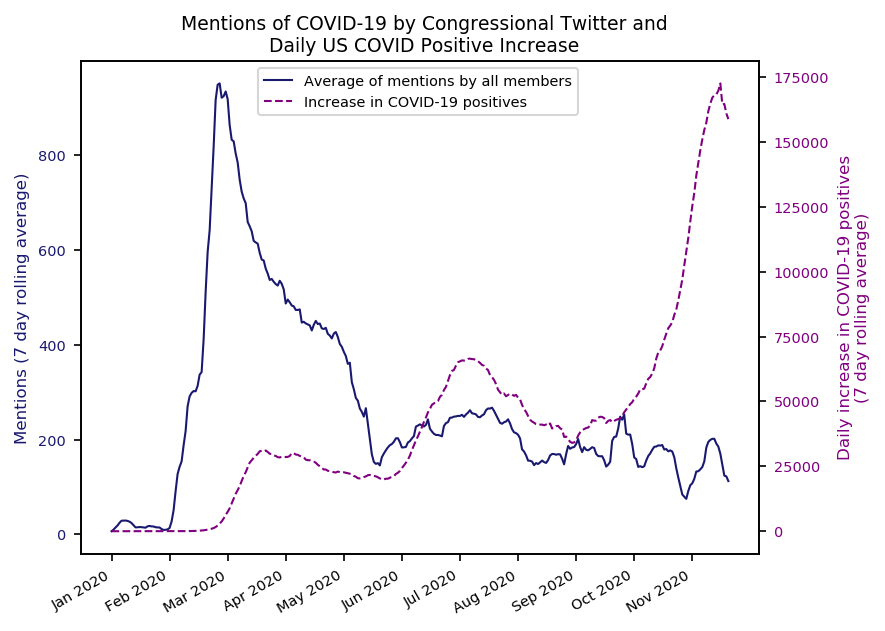

In [11]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Mentions (7 day rolling average)', c='midnightblue', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(total_pandemic_keyword_all_freq),
         label="Average of mentions by all members", c='midnightblue', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small", labelcolor='midnightblue')
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Daily increase in COVID-19 positives\n(7 day rolling average)', color='purple',fontsize=8)
ax2.plot(dates_pandemic[2:311], moving_average(positiveIncrease), 
         label="Increase in COVID-19 positives", c='purple', 
         linewidth=1,  linestyle='--')
ax2.tick_params(axis='y', labelcolor='purple', labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Congressional Twitter and\nDaily US COVID Positive Increase",
             fontsize=9, y=1.04, x=0.48)
fig.legend(fontsize='x-small', bbox_to_anchor=(0.65, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/PositivesAndAllMembers.png", bbox_inches='tight')
plt.show()

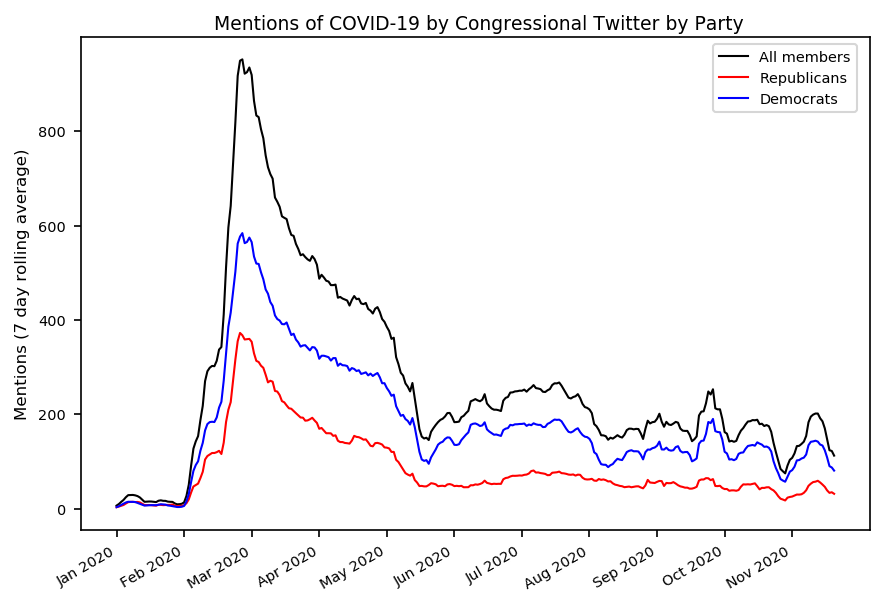

In [12]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(total_pandemic_keyword_all_freq), label="All members", c='black', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(House_R_pandemic_keyword_all_freq + Senate_R_pandemic_keyword_all_freq), 
        label="Republicans", c='r', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(House_D_pandemic_keyword_all_freq + Senate_D_pandemic_keyword_all_freq), 
        label="Democrats", c='b', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Congressional Twitter by Party", fontsize=9, y=1, x=0.54) #, y=1, x=0.48#
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/AllbyParty.png", bbox_inches='tight')
plt.show()

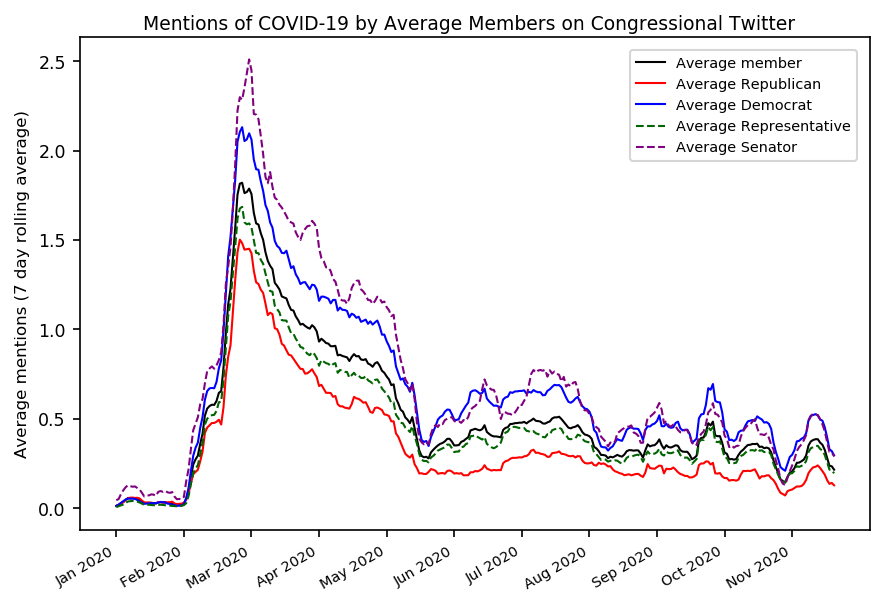

In [13]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(total_pandemic_keyword_all_freq_per_cap),
        label="Average member", c='black', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(R_pandemic_keyword_all_freq_per_cap),
         label="Average Republican", c='r', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(D_pandemic_keyword_all_freq_per_cap),
         label="Average Democrat", c='b', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(House_pandemic_keyword_all_freq_per_cap),
         label="Average Representative", c='darkgreen',
         linewidth=1,  linestyle='--')
ax.plot(dates_pandemic[2:311], moving_average(Senate_pandemic_keyword_all_freq_per_cap),
         label="Average Senator", c='purple', linewidth=1,  linestyle='--')
ax.tick_params(axis='y', labelsize="small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Average Members on Congressional Twitter", fontsize=9, y=1, x=0.53) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.94))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/AllbyParty_Average.png", bbox_inches='tight')
plt.show()

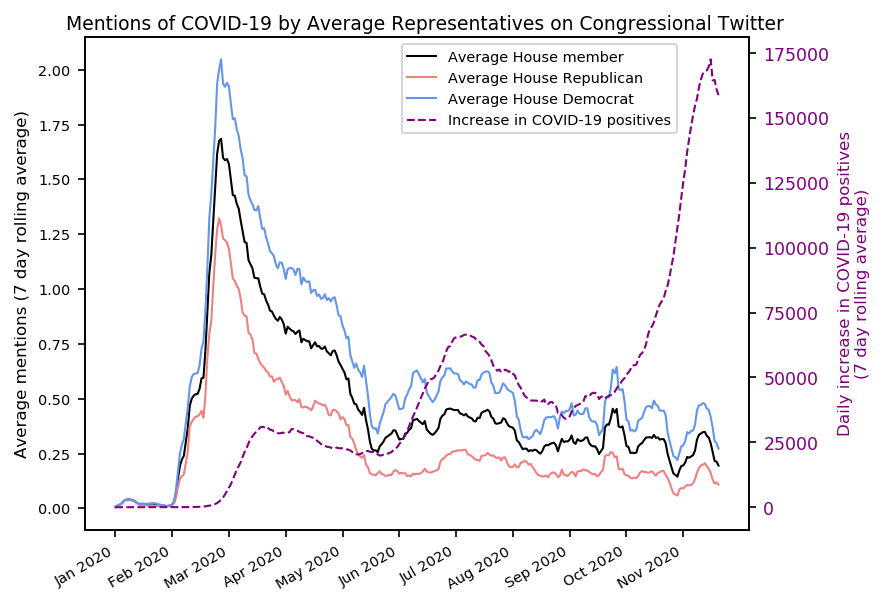

In [14]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(House_pandemic_keyword_all_freq_per_cap), 
        label="Average House member", c='black', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(House_R_pandemic_keyword_all_freq_per_cap), 
        label="Average House Republican", c='lightcoral', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(House_D_pandemic_keyword_all_freq_per_cap), 
        label="Average House Democrat", c='cornflowerblue', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Daily increase in COVID-19 positives\n(7 day rolling average)', color='purple', fontsize=8)
ax2.plot(dates_pandemic[2:311], moving_average(positiveIncrease), 
         label="Increase in COVID-19 positives", c='purple', 
         linewidth=1,  linestyle='--')
ax2.tick_params(axis='y', labelcolor='purple', labelsize="small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Average Representatives on Congressional Twitter", 
             fontsize=9,y=1, x=0.48) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.76, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/HousebyParty_Average.png", bbox_inches='tight')
plt.show()

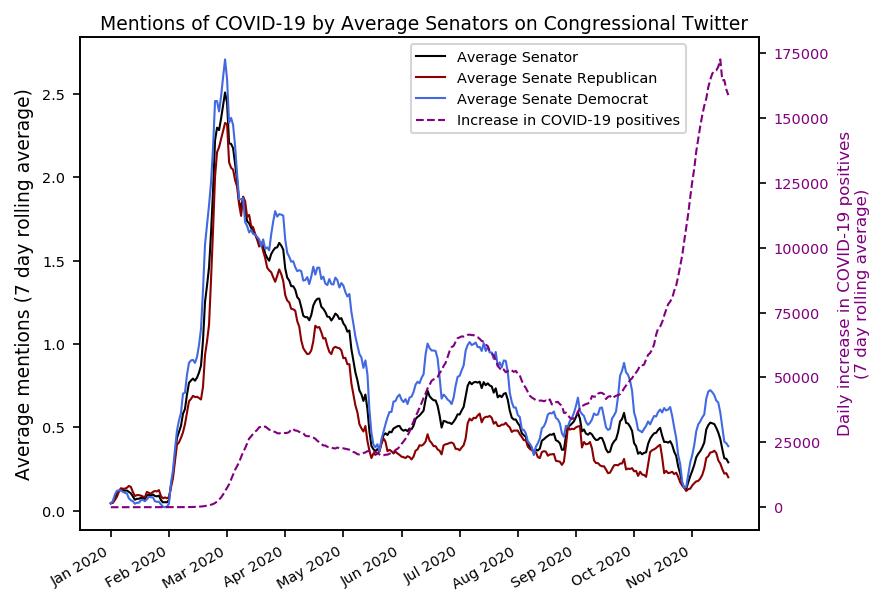

In [15]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average mentions (7 day rolling average)', fontsize=9)
ax.plot(dates_pandemic[2:311], moving_average(Senate_pandemic_keyword_all_freq_per_cap), 
        label="Average Senator", c='black', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(Senate_R_pandemic_keyword_all_freq_per_cap), 
        label="Average Senate Republican", c='darkred', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(Senate_D_pandemic_keyword_all_freq_per_cap), 
        label="Average Senate Democrat", c='royalblue', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Daily increase in COVID-19 positives\n(7 day rolling average)', color='purple', fontsize=8)
ax2.plot(dates_pandemic[2:311], moving_average(positiveIncrease), 
         label="Increase in COVID-19 positives", c='purple', 
         linewidth=1,  linestyle='--')
ax2.tick_params(axis='y', labelcolor='purple', labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Average Senators on Congressional Twitter", fontsize=9, y=1, x=0.48) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.77, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/SenatebyParty_Average.png", bbox_inches='tight')
plt.show()

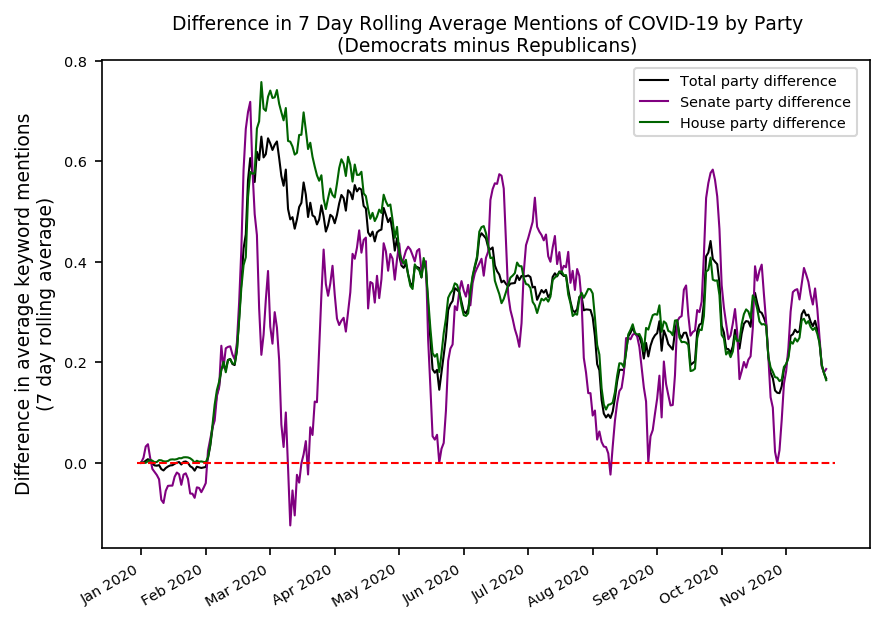

In [16]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Difference in average keyword mentions\n(7 day rolling average)', fontsize=9)
ax.plot(dates_pandemic[2:311], moving_average(D_pandemic_keyword_all_freq_per_cap - R_pandemic_keyword_all_freq_per_cap), 
        label="Total party difference", c='black', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(Senate_D_pandemic_keyword_all_freq_per_cap - Senate_R_pandemic_keyword_all_freq_per_cap), 
        label="Senate party difference", c='purple', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(House_D_pandemic_keyword_all_freq_per_cap - House_R_pandemic_keyword_all_freq_per_cap), 
        label="House party difference", c='darkgreen', linewidth=1)
ax.plot([dates_pandemic[0],dates_pandemic[-1]],[0,0],c='r', linestyle='--',linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Difference in 7 Day Rolling Average Mentions of COVID-19 by Party\n(Democrats minus Republicans)", fontsize=9, y=1.03, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(.96, 0.94))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/PartyDifference_7dayAverage.png", bbox_inches='tight')
plt.show()

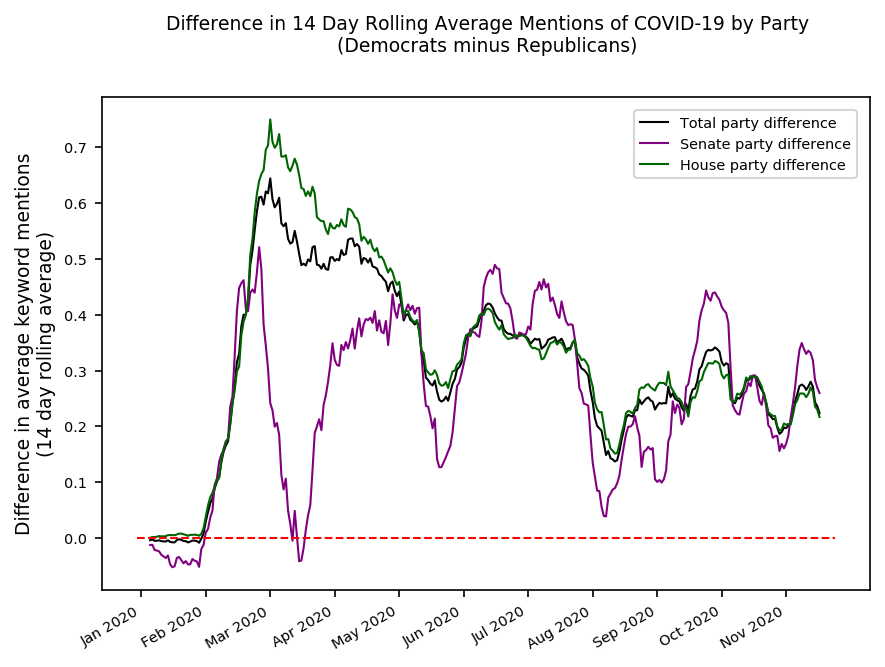

In [17]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Difference in average keyword mentions\n(14 day rolling average)', fontsize=9)
ax.plot(dates_pandemic[6:308], moving_average(D_pandemic_keyword_all_freq_per_cap - R_pandemic_keyword_all_freq_per_cap,14), 
        label="Total party difference", c='black', linewidth=1)
ax.plot(dates_pandemic[6:308], moving_average(Senate_D_pandemic_keyword_all_freq_per_cap - Senate_R_pandemic_keyword_all_freq_per_cap,14), 
        label="Senate party difference", c='purple', linewidth=1)
ax.plot(dates_pandemic[6:308], moving_average(House_D_pandemic_keyword_all_freq_per_cap - House_R_pandemic_keyword_all_freq_per_cap,14), 
        label="House party difference", c='darkgreen', linewidth=1)
ax.plot([dates_pandemic[0],dates_pandemic[-1]],[0,0],c='r', linestyle='--',linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Difference in 14 Day Rolling Average Mentions of COVID-19 by Party\n(Democrats minus Republicans)",
             fontsize=9, y=1.1, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.94))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/PartyDifference_14dayAverage.png", bbox_inches='tight')
plt.show()

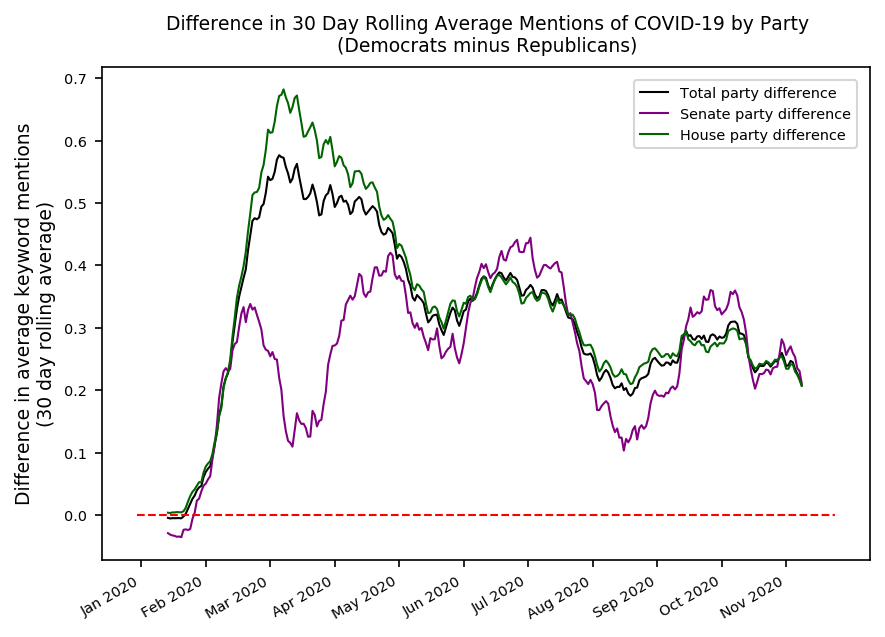

In [18]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Difference in average keyword mentions\n(30 day rolling average)', fontsize=9)
ax.plot(dates_pandemic[14:300], moving_average(D_pandemic_keyword_all_freq_per_cap - R_pandemic_keyword_all_freq_per_cap,30), 
        label="Total party difference", c='black', linewidth=1)
ax.plot(dates_pandemic[14:300], moving_average(Senate_D_pandemic_keyword_all_freq_per_cap - Senate_R_pandemic_keyword_all_freq_per_cap,30), 
        label="Senate party difference", c='purple', linewidth=1)
ax.plot(dates_pandemic[14:300], moving_average(House_D_pandemic_keyword_all_freq_per_cap - House_R_pandemic_keyword_all_freq_per_cap,30), 
        label="House party difference", c='darkgreen', linewidth=1)
ax.plot([dates_pandemic[0],dates_pandemic[-1]],[0,0],c='r', linestyle='--',linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Difference in 30 Day Rolling Average Mentions of COVID-19 by Party\n(Democrats minus Republicans)", fontsize=9, y=1.05, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.94))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/PartyDifference_30dayAverage.png", bbox_inches='tight')
plt.show()

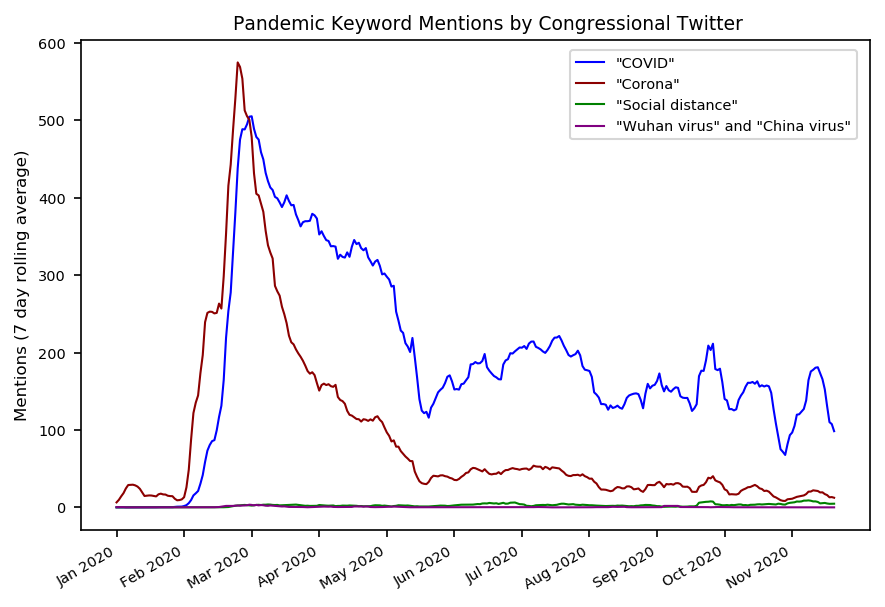

In [19]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(covid_freq), 
        label="\"COVID\"", c='blue', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(corona_freq), 
        label="\"Corona\"", c='darkred', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(socialdistance_freq), 
        label="\"Social distance\"", c='green', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(wuhanchina_freq), 
        label="\"Wuhan virus\" and \"China virus\"", c='purple', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.14, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Pandemic Keyword Mentions by Congressional Twitter", fontsize=9, y=1, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.94))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/KeywordMentions_All.png", bbox_inches='tight')
plt.show()

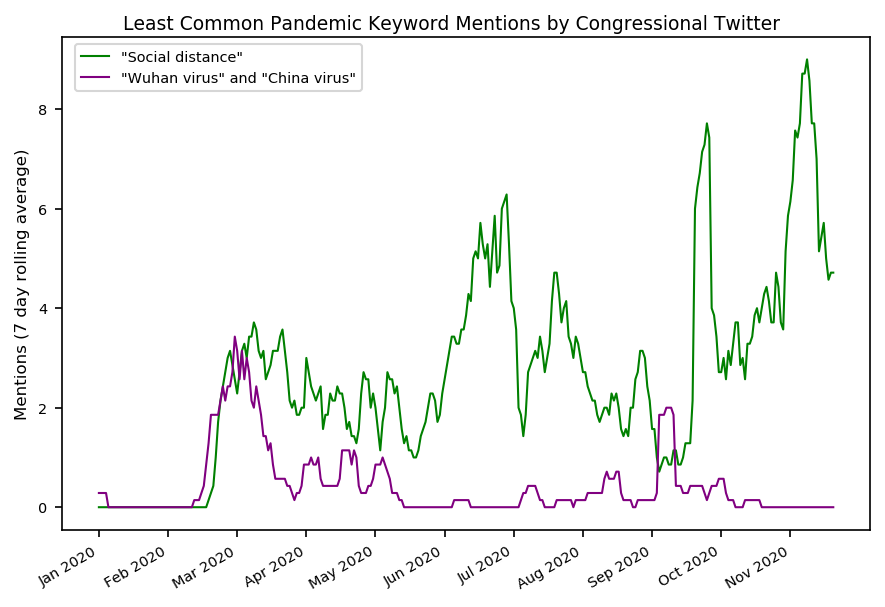

In [20]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(socialdistance_freq), 
        label="\"Social distance\"", c='green', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(wuhanchina_freq), 
        label="\"Wuhan virus\" and \"China virus\"", c='purple', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.14, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Least Common Pandemic Keyword Mentions by Congressional Twitter", fontsize=9, y=1, x=0.51) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.41, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/KeywordMentions_LessCommon.png", bbox_inches='tight')
plt.show()

## Prepandemic data plots

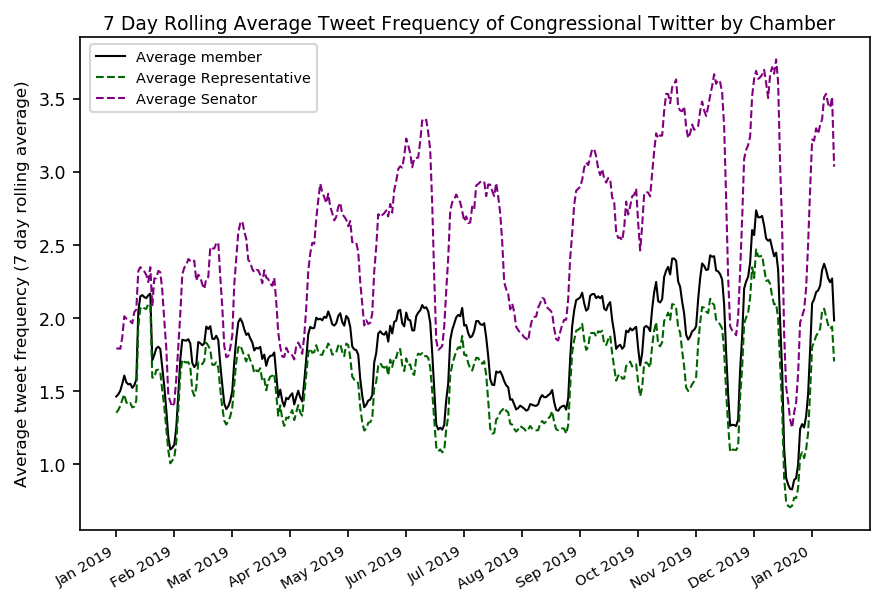

In [21]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average tweet frequency (7 day rolling average)', fontsize=8)
ax.plot(dates_prepandemic[3:363], moving_average(total_prepandemic_all_freq_per_cap),
        label="Average member", c='black', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(House_prepandemic_all_freq_per_cap),
         label="Average Representative", c='darkgreen',
         linewidth=1,  linestyle='--')
ax.plot(dates_prepandemic[3:363], moving_average(Senate_prepandemic_all_freq_per_cap),
         label="Average Senator", c='purple', linewidth=1,  linestyle='--')
ax.tick_params(axis='y', labelsize="small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[3:363])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("7 Day Rolling Average Tweet Frequency of Congressional Twitter by Chamber", fontsize=9, y=1, x=0.53) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.36, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/AllbyChamber_7DayAverage.png", bbox_inches='tight')

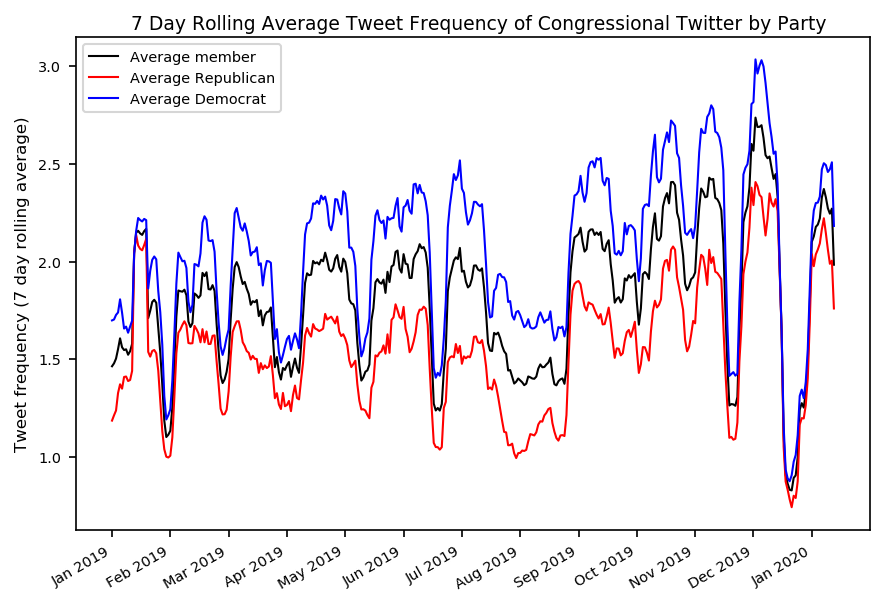

In [22]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Tweet frequency (7 day rolling average)', fontsize=8)
ax.plot(dates_prepandemic[3:363], moving_average(total_prepandemic_all_freq_per_cap), 
        label="Average member", c='black', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(R_prepandemic_all_freq_per_cap), 
        label="Average Republican", c='r', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(D_prepandemic_all_freq_per_cap), 
        label="Average Democrat", c='b', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[3:363])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("7 Day Rolling Average Tweet Frequency of Congressional Twitter by Party",
             fontsize=9, y=1.0, x=0.54)
fig.legend(fontsize='x-small', bbox_to_anchor=(0.32, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/AllbyParty_7dayAverage.png", bbox_inches='tight')
plt.show()

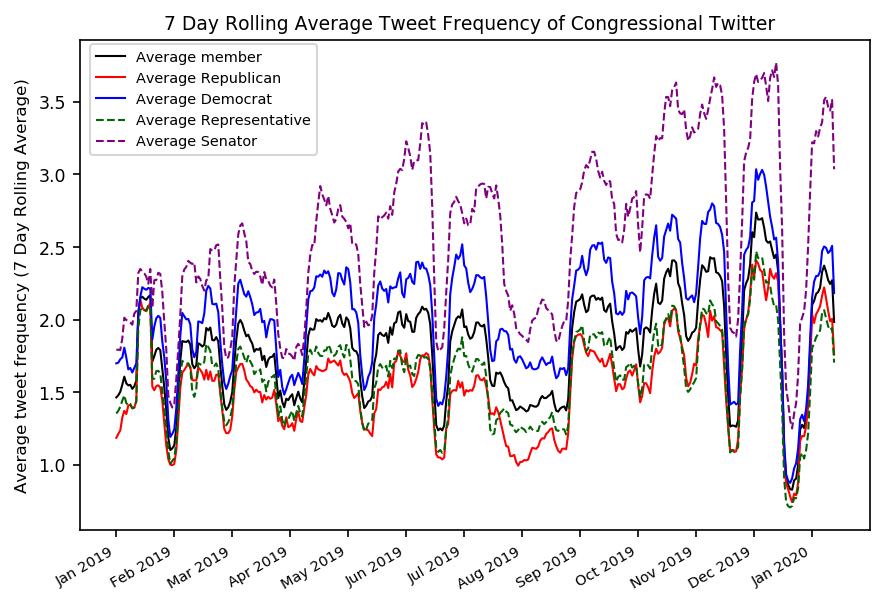

In [23]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average tweet frequency (7 Day Rolling Average)', fontsize=8)
ax.plot(dates_prepandemic[3:363], moving_average(total_prepandemic_all_freq_per_cap),
        label="Average member", c='black', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(R_prepandemic_all_freq_per_cap),
         label="Average Republican", c='r', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(D_prepandemic_all_freq_per_cap),
         label="Average Democrat", c='b', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(House_prepandemic_all_freq_per_cap),
         label="Average Representative", c='darkgreen',
         linewidth=1,  linestyle='--')
ax.plot(dates_prepandemic[3:363], moving_average(Senate_prepandemic_all_freq_per_cap),
         label="Average Senator", c='purple', linewidth=1,  linestyle='--')
ax.tick_params(axis='y', labelsize="small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[3:363])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("7 Day Rolling Average Tweet Frequency of Congressional Twitter", fontsize=9, y=1, x=0.53) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.36, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/AllbyPartyChamber_7DayAverage.png", bbox_inches='tight')

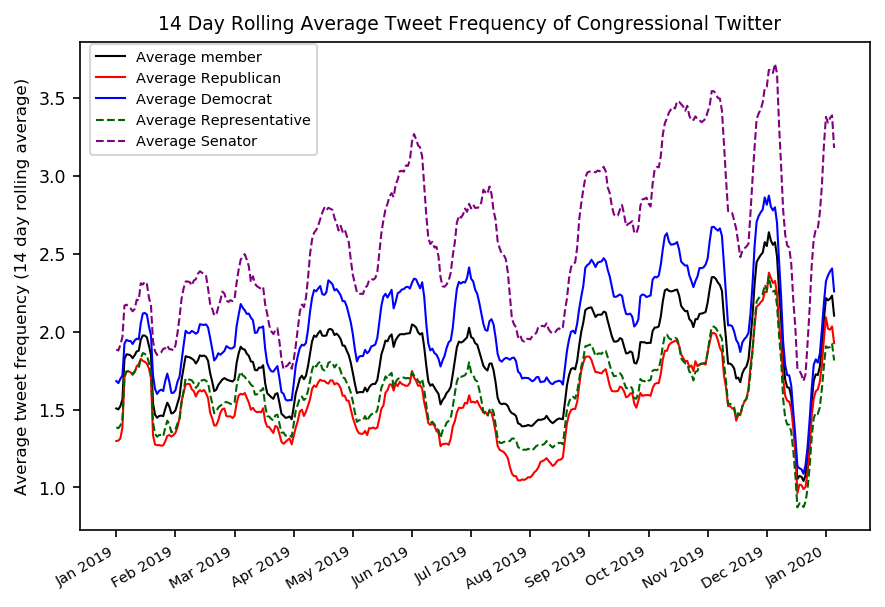

In [24]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average tweet frequency (14 day rolling average)', fontsize=8)
ax.plot(dates_prepandemic[6:359], moving_average(total_prepandemic_all_freq_per_cap,14),
        label="Average member", c='black', linewidth=1)
ax.plot(dates_prepandemic[6:359], moving_average(R_prepandemic_all_freq_per_cap,14),
         label="Average Republican", c='r', linewidth=1)
ax.plot(dates_prepandemic[6:359], moving_average(D_prepandemic_all_freq_per_cap,14),
         label="Average Democrat", c='b', linewidth=1)
ax.plot(dates_prepandemic[6:359], moving_average(House_prepandemic_all_freq_per_cap,14),
         label="Average Representative", c='darkgreen',
         linewidth=1,  linestyle='--')
ax.plot(dates_prepandemic[6:359], moving_average(Senate_prepandemic_all_freq_per_cap,14),
         label="Average Senator", c='purple', linewidth=1,  linestyle='--')
ax.tick_params(axis='y', labelsize="small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[6:359])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("14 Day Rolling Average Tweet Frequency of Congressional Twitter", fontsize=9, y=1, x=0.53) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.36, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/AllbyPartyChamber_14DayAverage.png", bbox_inches='tight')

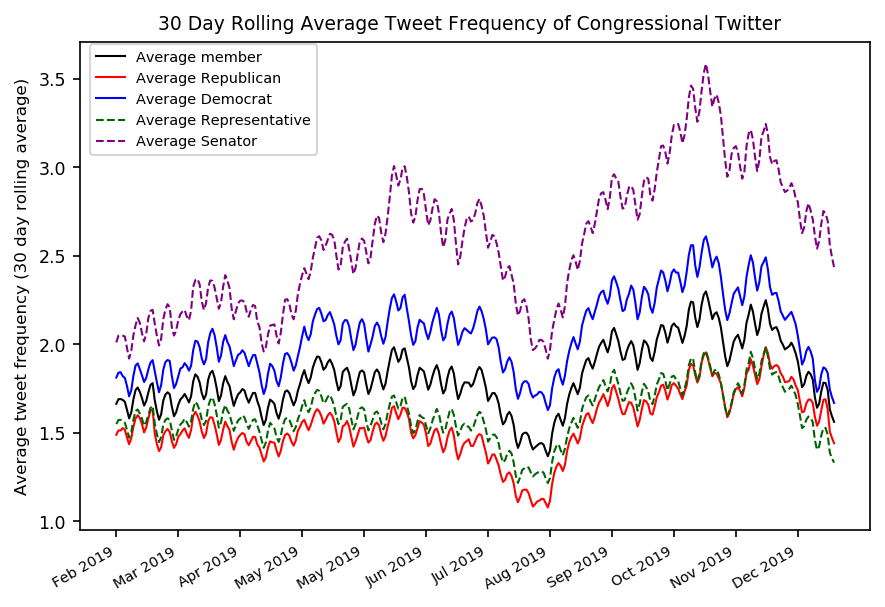

In [25]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average tweet frequency (30 day rolling average)', fontsize=8)
ax.plot(dates_prepandemic[14:351], moving_average(total_prepandemic_all_freq_per_cap,30),
        label="Average member", c='black', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(R_prepandemic_all_freq_per_cap,30),
         label="Average Republican", c='r', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(D_prepandemic_all_freq_per_cap,30),
         label="Average Democrat", c='b', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(House_prepandemic_all_freq_per_cap,30),
         label="Average Representative", c='darkgreen',
         linewidth=1,  linestyle='--')
ax.plot(dates_prepandemic[14:351], moving_average(Senate_prepandemic_all_freq_per_cap,30),
         label="Average Senator", c='purple', linewidth=1,  linestyle='--')
ax.tick_params(axis='y', labelsize="small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[14:351])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("30 Day Rolling Average Tweet Frequency of Congressional Twitter", fontsize=9, y=1, x=0.53) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.36, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/AllbyPartyChamber_30DayAverage.png", bbox_inches='tight')

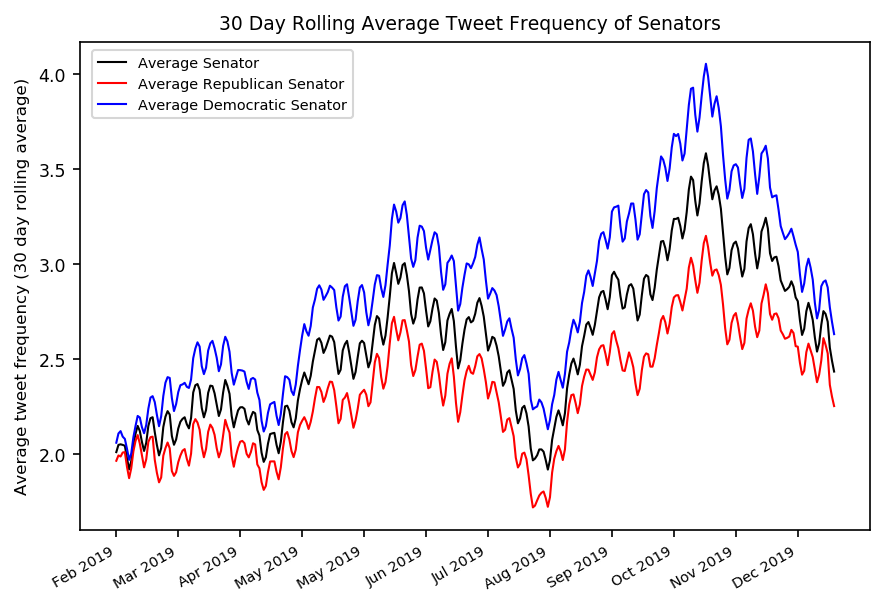

In [26]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Average tweet frequency (30 day rolling average)', fontsize=8)
ax.plot(dates_prepandemic[14:351], moving_average(Senate_prepandemic_all_freq_per_cap,30),
        label="Average Senator", c='black', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(Senate_R_prepandemic_all_freq_per_cap,30),
         label="Average Republican Senator", c='r', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(Senate_D_prepandemic_all_freq_per_cap,30),
         label="Average Democratic Senator", c='b', linewidth=1)
ax.tick_params(axis='y', labelsize="small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[14:351])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("30 Day Rolling Average Tweet Frequency of Senators", fontsize=9, y=1, x=0.53) 
fig.legend(fontsize='x-small', bbox_to_anchor=(0.4, 0.94))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/SenateByParty_30DayAverage.png", bbox_inches='tight')

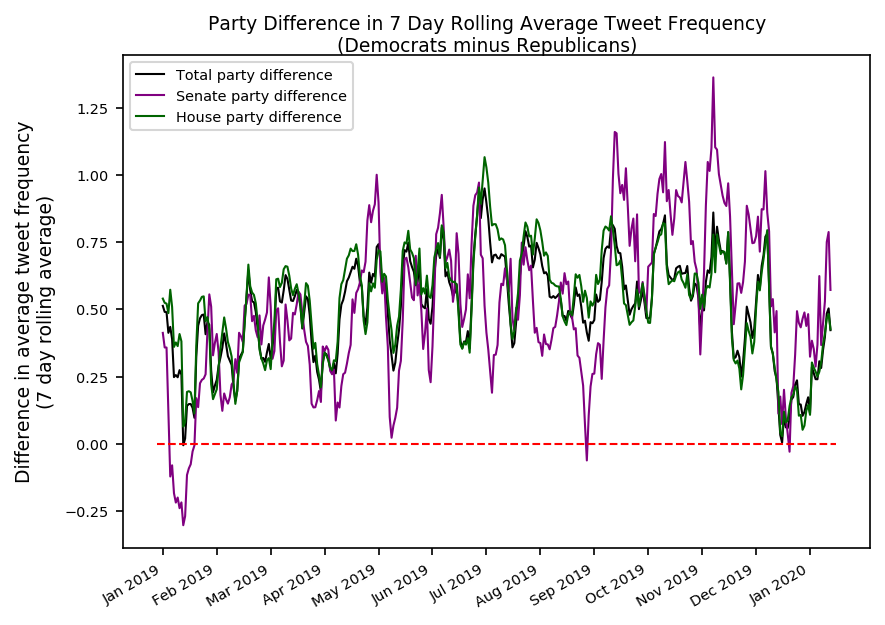

In [27]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Difference in average tweet frequency\n(7 day rolling average)', fontsize=9)
ax.plot(dates_prepandemic[3:363], moving_average(D_prepandemic_all_freq_per_cap - R_prepandemic_all_freq_per_cap), 
        label="Total party difference", c='black', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(Senate_D_prepandemic_all_freq_per_cap - Senate_R_prepandemic_all_freq_per_cap), 
        label="Senate party difference", c='purple', linewidth=1)
ax.plot(dates_prepandemic[3:363], moving_average(House_D_prepandemic_all_freq_per_cap - House_R_prepandemic_all_freq_per_cap), 
        label="House party difference", c='darkgreen', linewidth=1)
ax.plot([dates_prepandemic[0],dates_prepandemic[-1]],[0,0],c='r', linestyle='--',linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[3:363])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Party Difference in 7 Day Rolling Average Tweet Frequency\n(Democrats minus Republicans)", fontsize=9, y=1.03, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(.4, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/PartyDifference_7DayAverage.png", bbox_inches='tight')
plt.show()

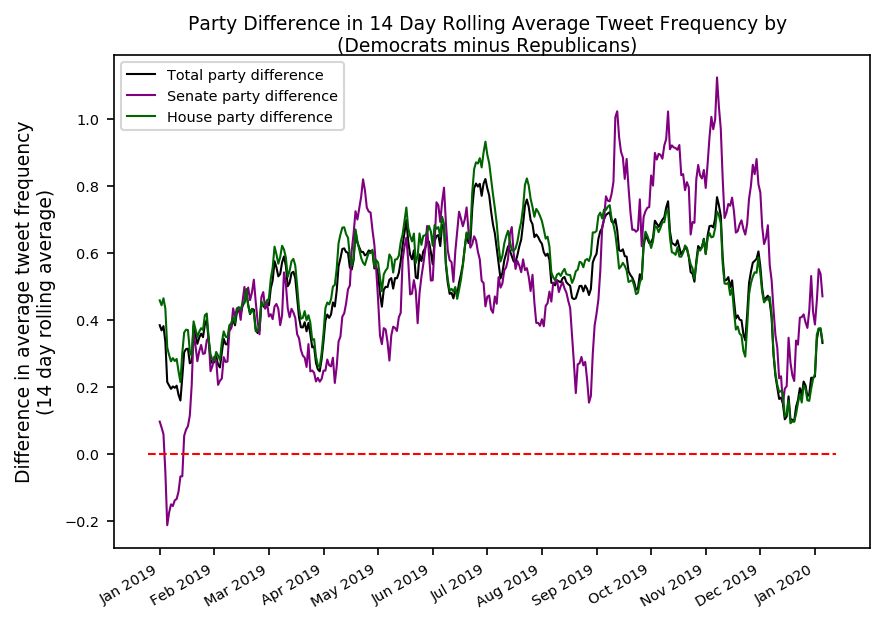

In [28]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Difference in average tweet frequency\n(14 day rolling average)', fontsize=9)
ax.plot(dates_prepandemic[6:359], moving_average(D_prepandemic_all_freq_per_cap - R_prepandemic_all_freq_per_cap,14), 
        label="Total party difference", c='black', linewidth=1)
ax.plot(dates_prepandemic[6:359], moving_average(Senate_D_prepandemic_all_freq_per_cap - Senate_R_prepandemic_all_freq_per_cap,14), 
        label="Senate party difference", c='purple', linewidth=1)
ax.plot(dates_prepandemic[6:359], moving_average(House_D_prepandemic_all_freq_per_cap - House_R_prepandemic_all_freq_per_cap,14), 
        label="House party difference", c='darkgreen', linewidth=1)
ax.plot([dates_prepandemic[0],dates_prepandemic[-1]],[0,0],c='r', linestyle='--',linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[6:359])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Party Difference in 14 Day Rolling Average Tweet Frequency by\n(Democrats minus Republicans)", fontsize=9, y=1.03, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(.39, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/PartyDifference_14DayAverage.png", bbox_inches='tight')
plt.show()

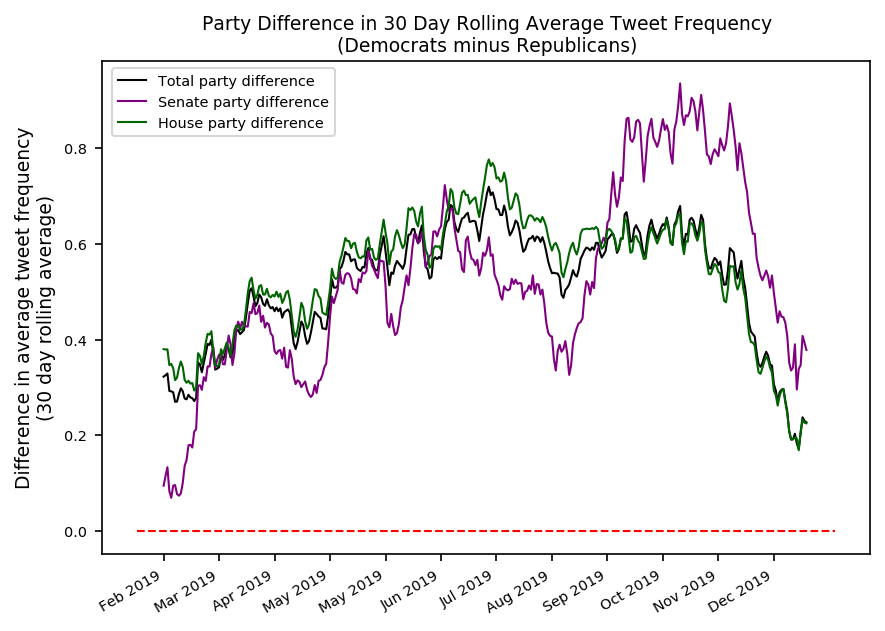

In [29]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Difference in average tweet frequency\n(30 day rolling average)', fontsize=9)
ax.plot(dates_prepandemic[14:351], moving_average(D_prepandemic_all_freq_per_cap - R_prepandemic_all_freq_per_cap,30), 
        label="Total party difference", c='black', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(Senate_D_prepandemic_all_freq_per_cap - Senate_R_prepandemic_all_freq_per_cap,30), 
        label="Senate party difference", c='purple', linewidth=1)
ax.plot(dates_prepandemic[14:351], moving_average(House_D_prepandemic_all_freq_per_cap - House_R_prepandemic_all_freq_per_cap,30), 
        label="House party difference", c='darkgreen', linewidth=1)
ax.plot([dates_prepandemic[0],dates_prepandemic[-1]],[0,0],c='r', linestyle='--',linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_prepandemic[14:351])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Party Difference in 30 Day Rolling Average Tweet Frequency\n(Democrats minus Republicans)", fontsize=9, y=1.04, x=0.55) 
fig.legend(fontsize='x-small', bbox_to_anchor=(.38, 0.95))
fig.tight_layout()
fig.savefig("Plots/Prepandemic/PartyDifference_30DayAverage.png", bbox_inches='tight')
plt.show()

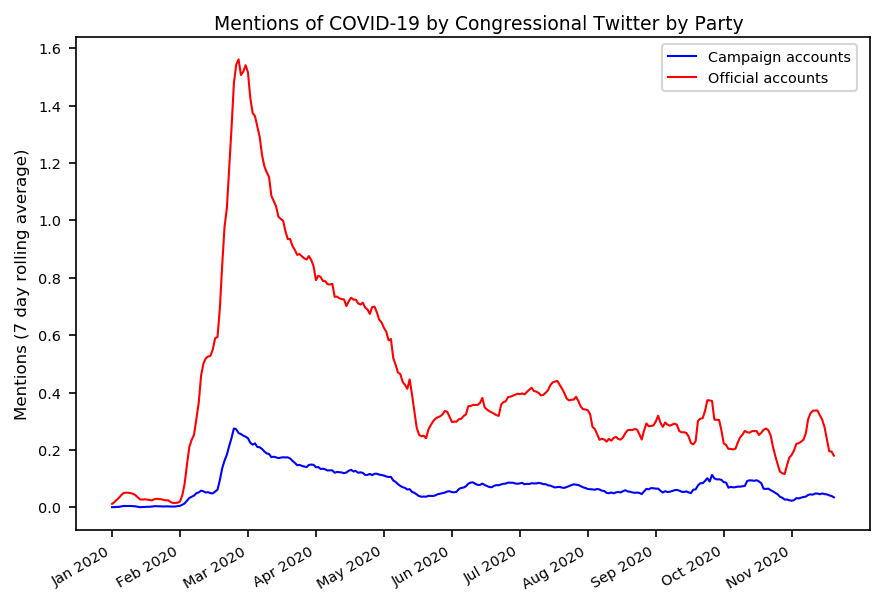

In [31]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(campaign_total_pandemic_keyword_all_freq_per_cap), 
        label="Campaign accounts", c='blue', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(official_total_pandemic_keyword_all_freq_per_cap), 
        label="Official accounts", c='r', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Congressional Twitter by Party", fontsize=9, y=1, x=0.54) #, y=1, x=0.48#
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/CampaignAndOfficial.png", bbox_inches='tight')
plt.show()

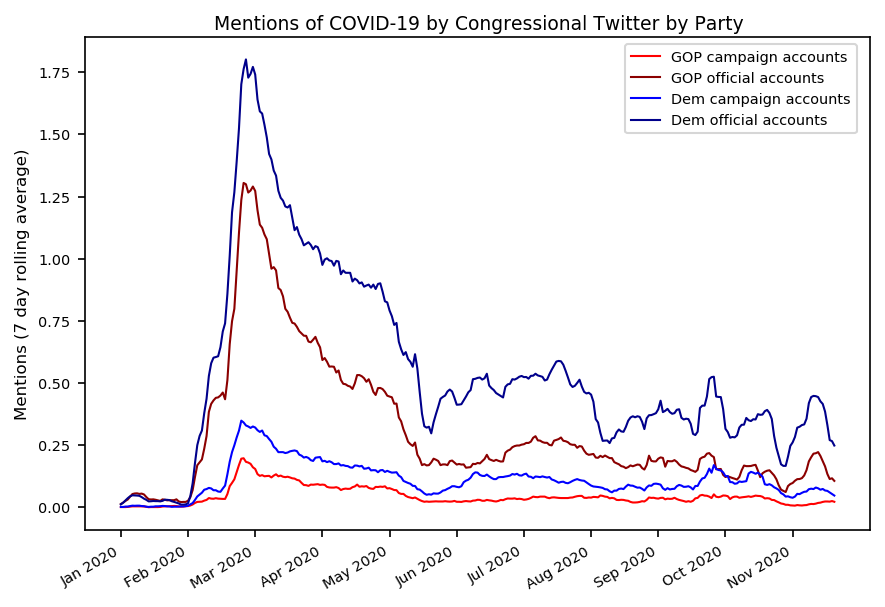

In [36]:
fig, ax = plt.subplots(dpi=150)

ax.set_ylabel('Mentions (7 day rolling average)', fontsize=8)
ax.plot(dates_pandemic[2:311], moving_average(campaign_R_pandemic_keyword_all_freq_per_cap), 
        label="GOP campaign accounts", c='red', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(official_R_pandemic_keyword_all_freq_per_cap), 
        label="GOP official accounts", c='darkred', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(campaign_D_pandemic_keyword_all_freq_per_cap), 
        label="Dem campaign accounts", c='blue', linewidth=1)
ax.plot(dates_pandemic[2:311], moving_average(official_D_pandemic_keyword_all_freq_per_cap), 
        label="Dem official accounts", c='darkblue', linewidth=1)
ax.tick_params(axis='y', labelsize="x-small")
ax.tick_params(axis='x', rotation=75, labelsize="x-small")

every_nth = 29
labels = plt.xticks(dates_pandemic[2:311])
xticks = ax.xaxis.get_major_ticks()
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        xticks[n].set_visible(False)

myFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

#fig.text(x=0.12, y=0.91, s='Zayne Sember\n@GluonsAreFun', fontsize=6, c='gray')
fig.suptitle("Mentions of COVID-19 by Congressional Twitter by Party", fontsize=9, y=1, x=0.54) #, y=1, x=0.48#
fig.legend(fontsize='x-small', bbox_to_anchor=(0.96, 0.95))
fig.tight_layout()
fig.savefig("Plots/Pandemic_keywords/CampaignAndOfficialByParty.png", bbox_inches='tight')
plt.show()